In [39]:
# import pickle
from src.human_exp_database import HumanExperimentResults
from src.consts import *
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib
import pickle
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import math
from src.utils import *
from collections import defaultdict
%matplotlib inline

## Load data

Generated from `python-jl notebooks/human_experiments.py`


In [51]:
with open("human_exp2_results_second.pkl", 'rb') as handle:
    r = pickle.load(handle)

9722382
5
8349831
5
4020521
5
4842726
5
7543747
5
9404362
5
9479411
5
9188145
5
6333883
5
2896074
5
5831456
5
9664366
5
3499382
5
4887169
5
8035917
5
6028768
5
0350283
5
8136373
5
7528739
5
3307302
5
8760618
5
4574413
5
4435465
5
8615341
5
4832813
5


KeyboardInterrupt: 

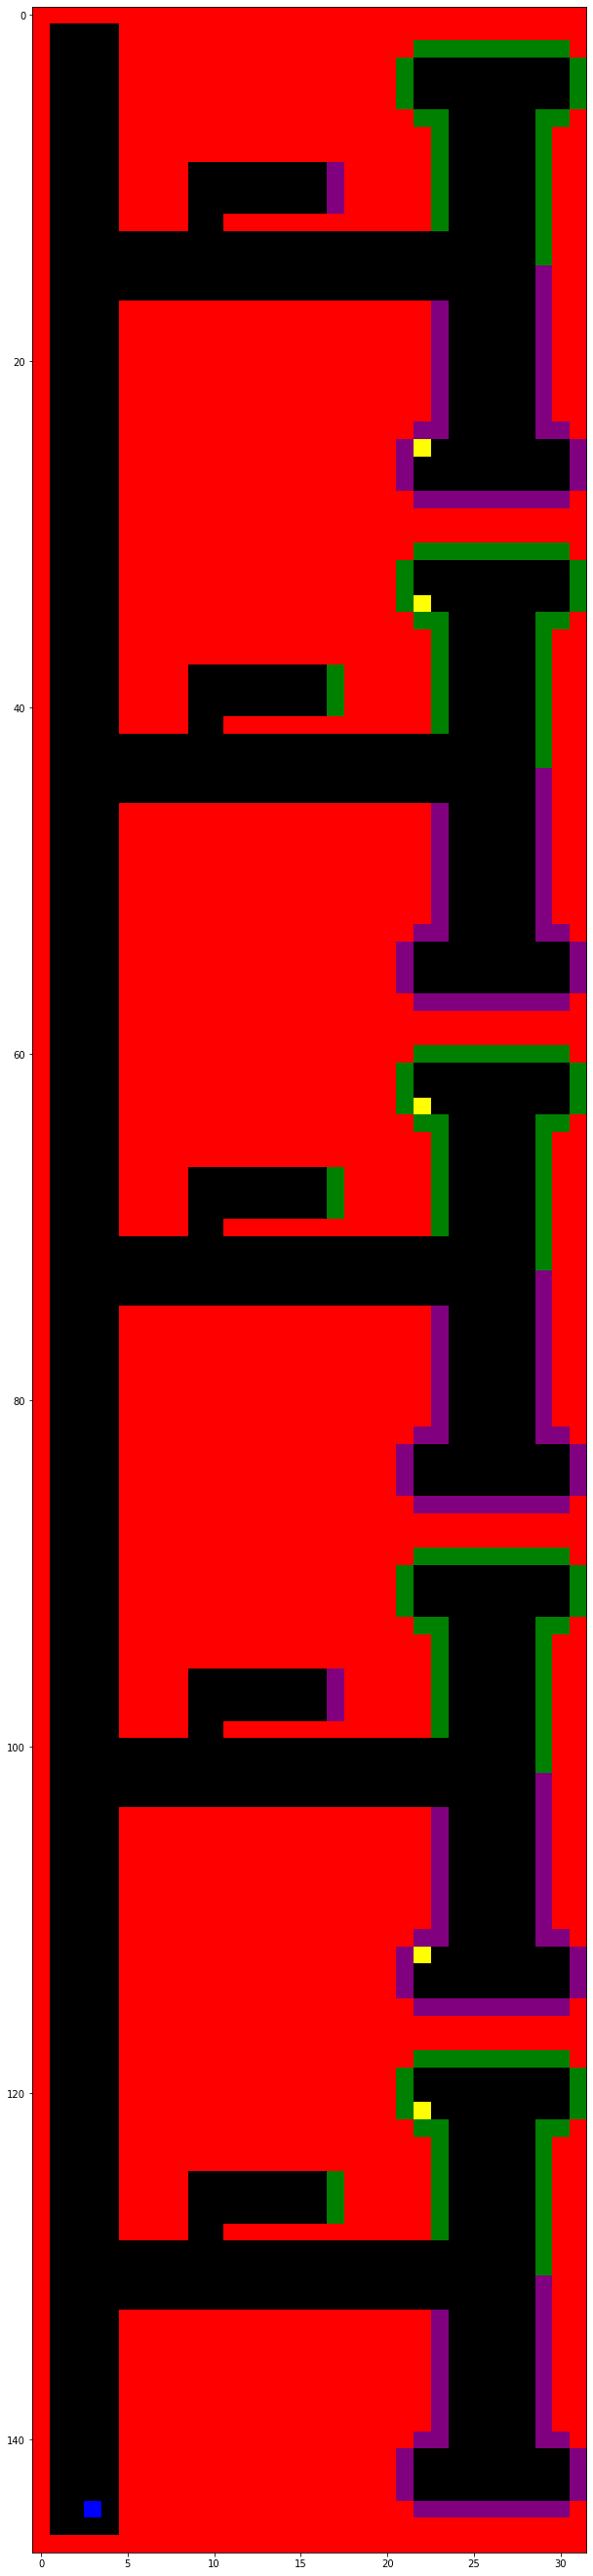

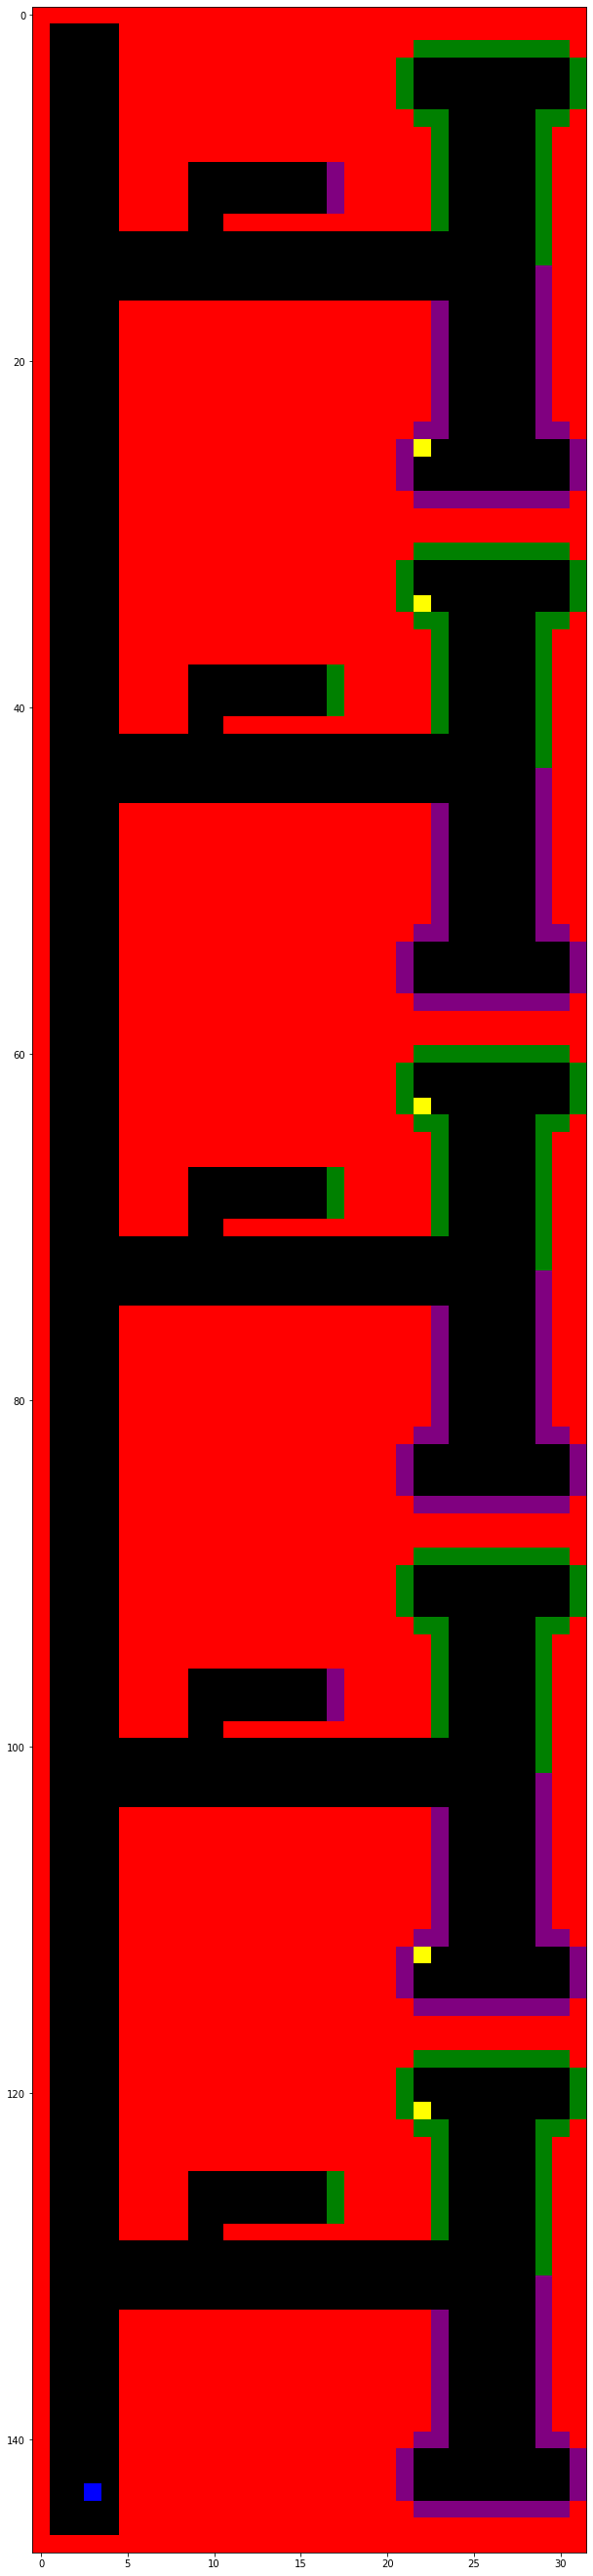

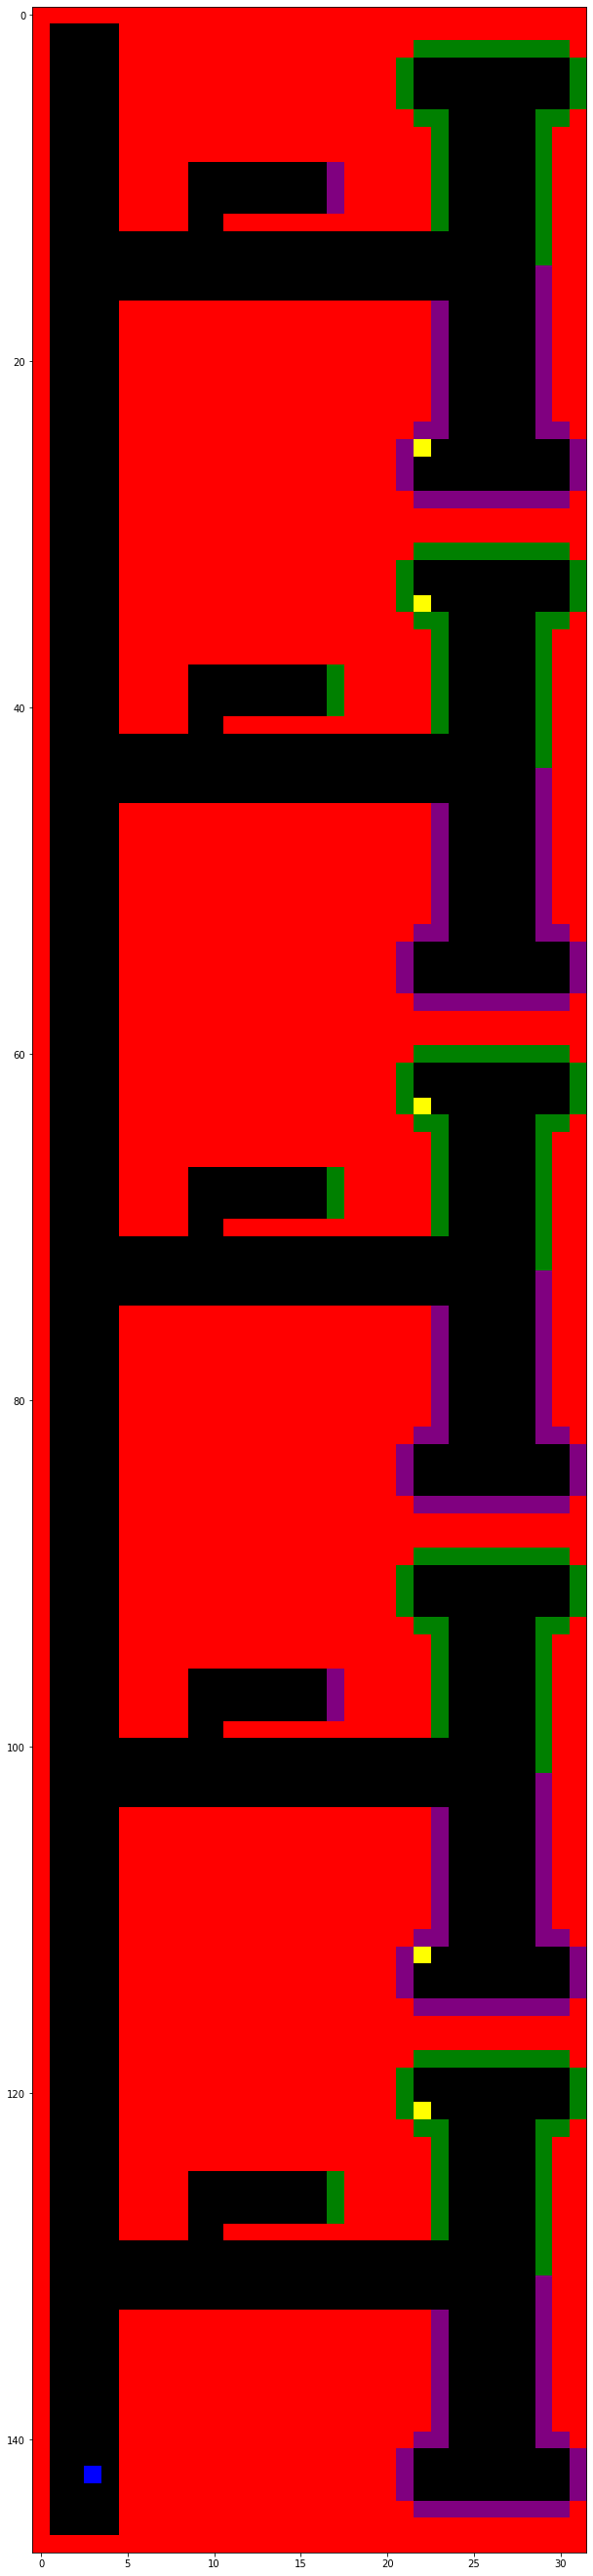

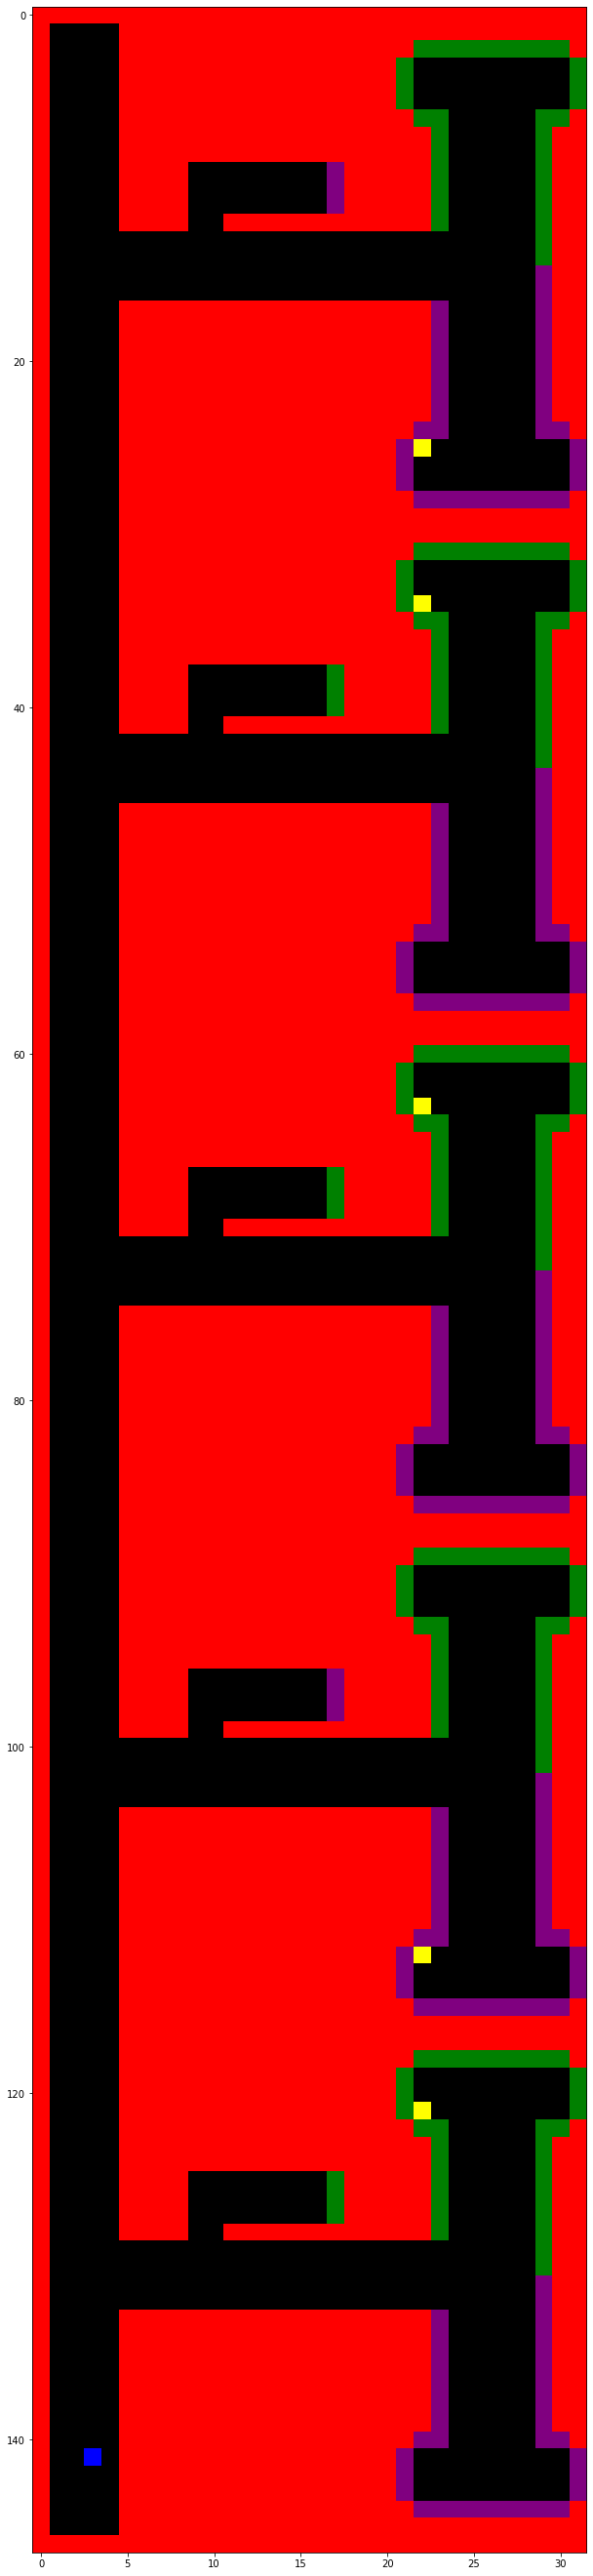

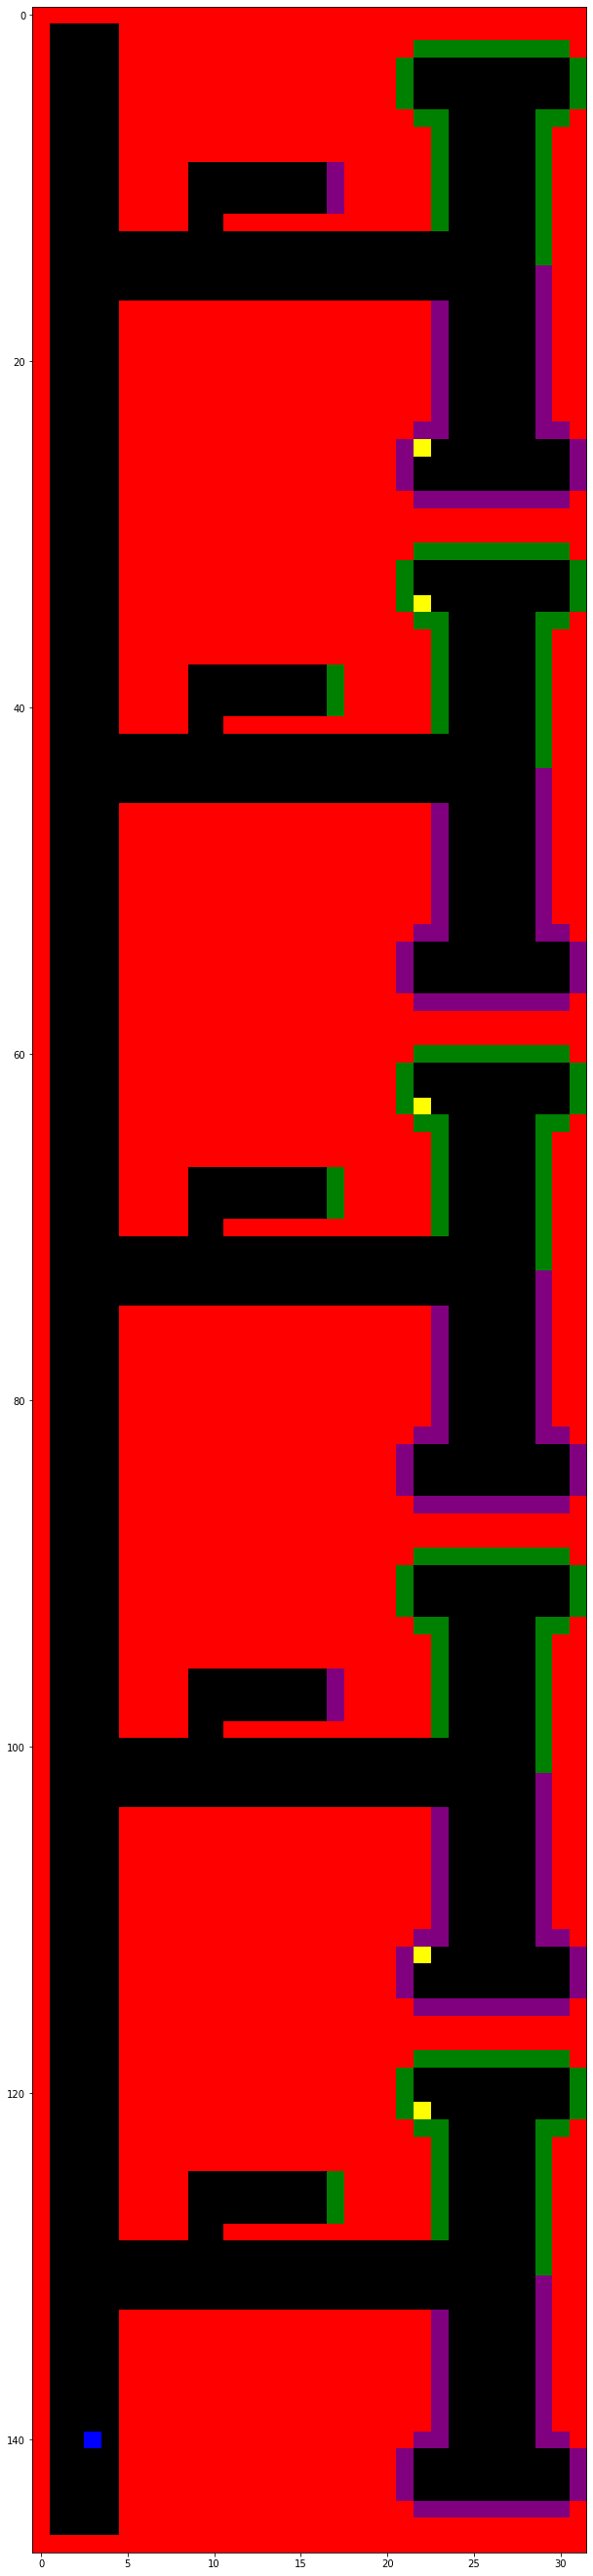

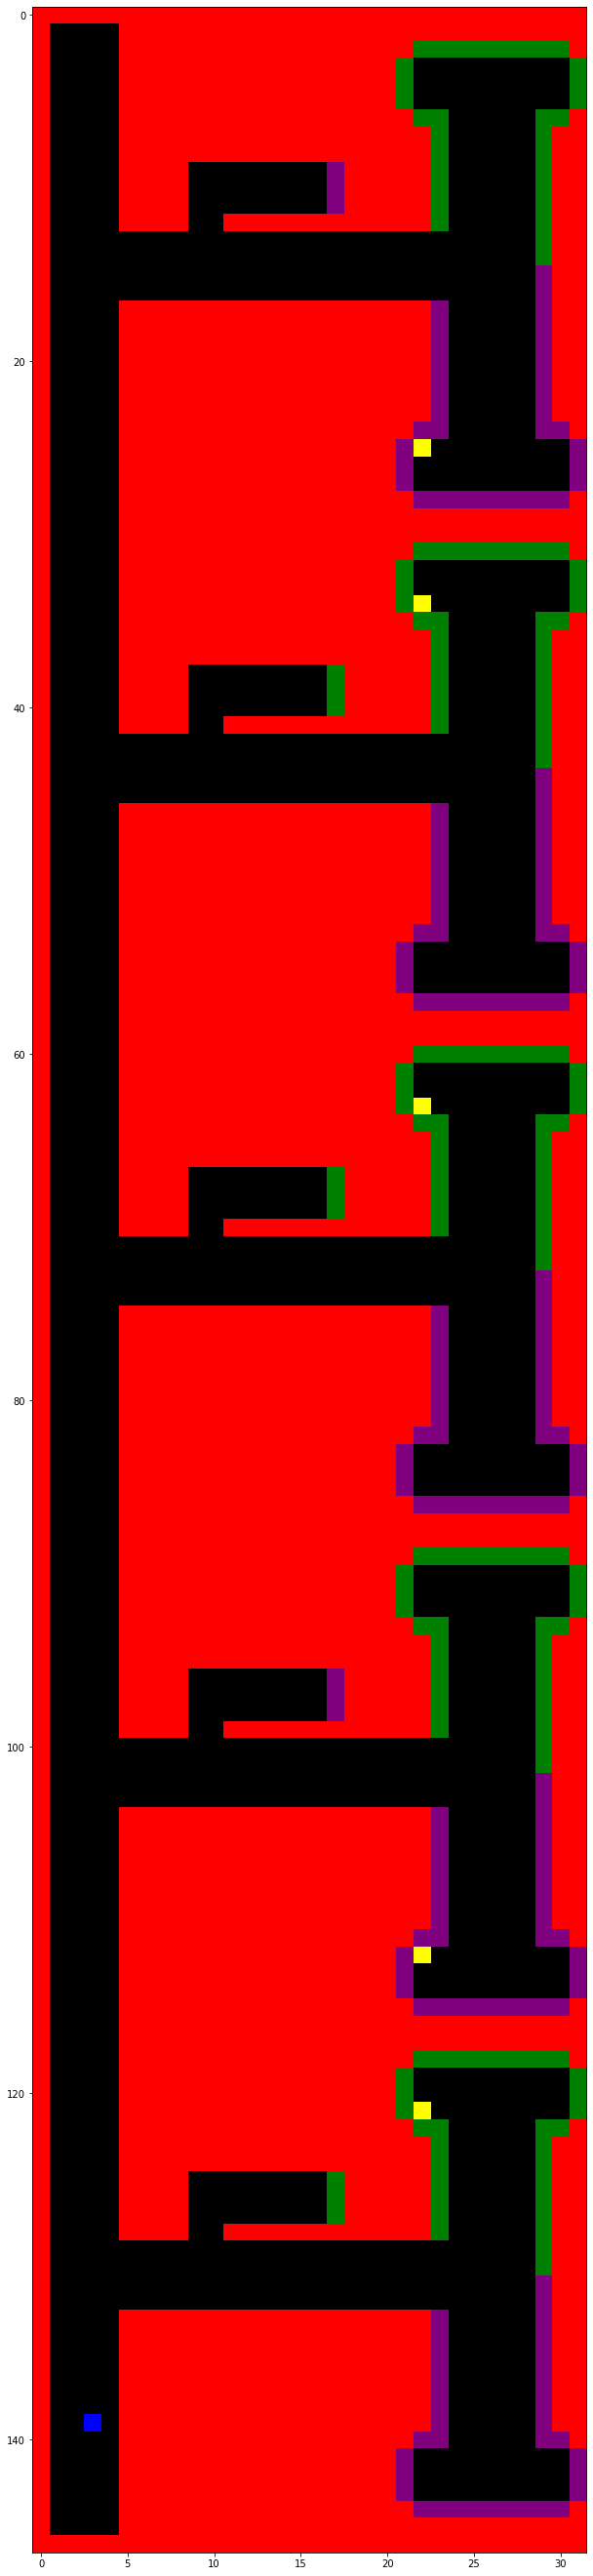

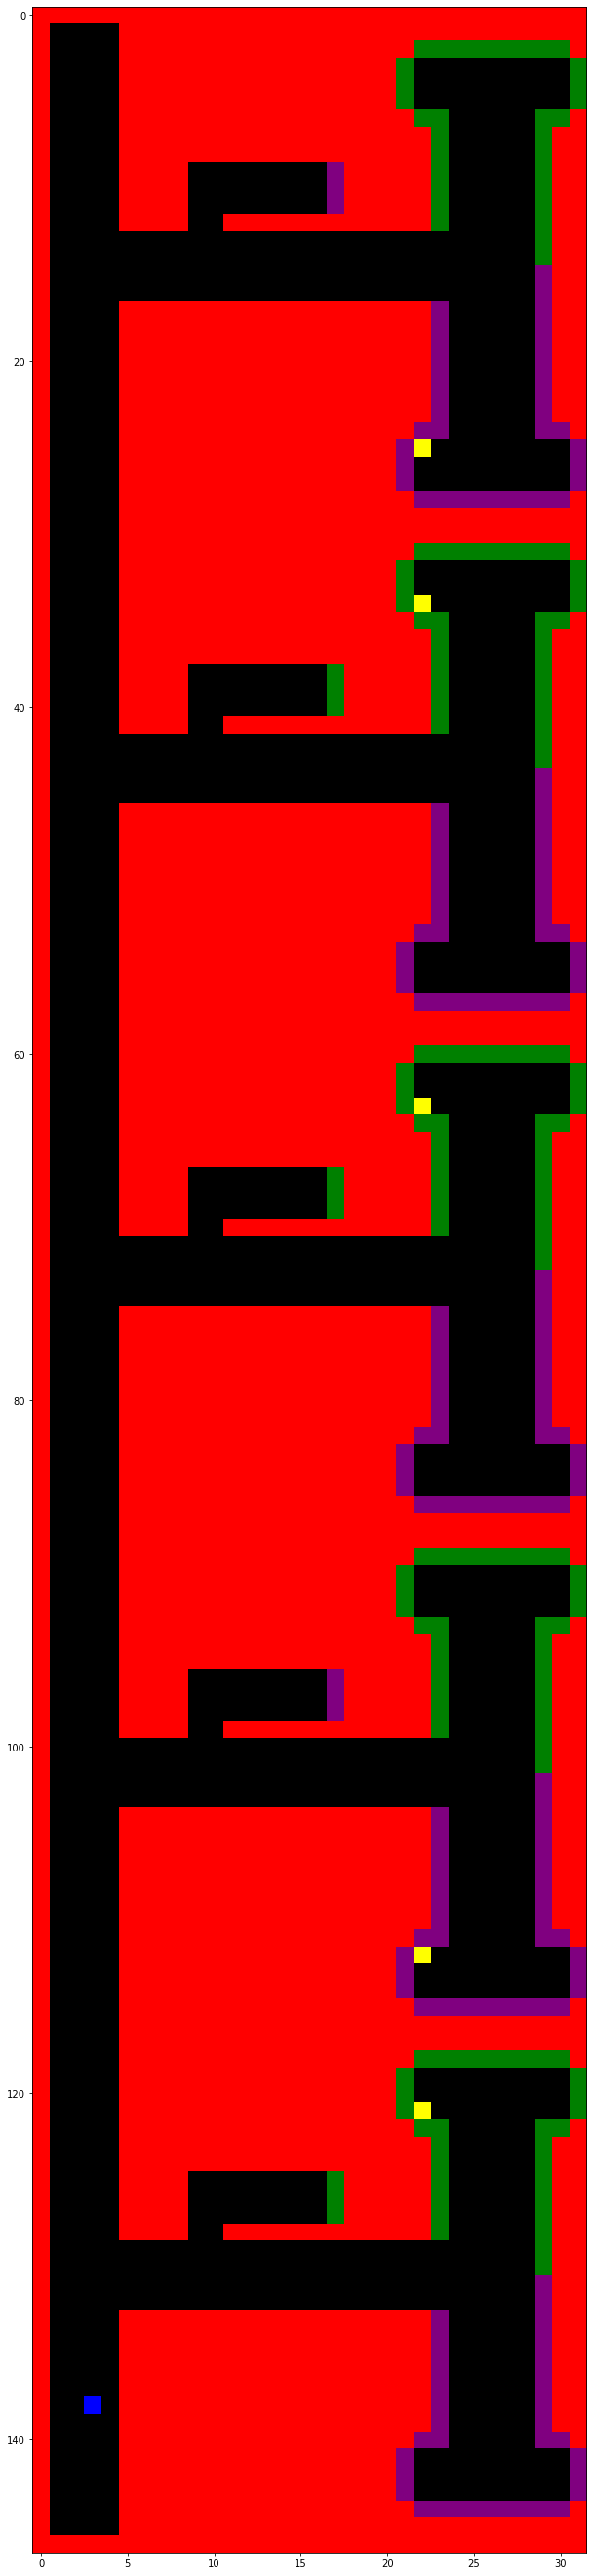

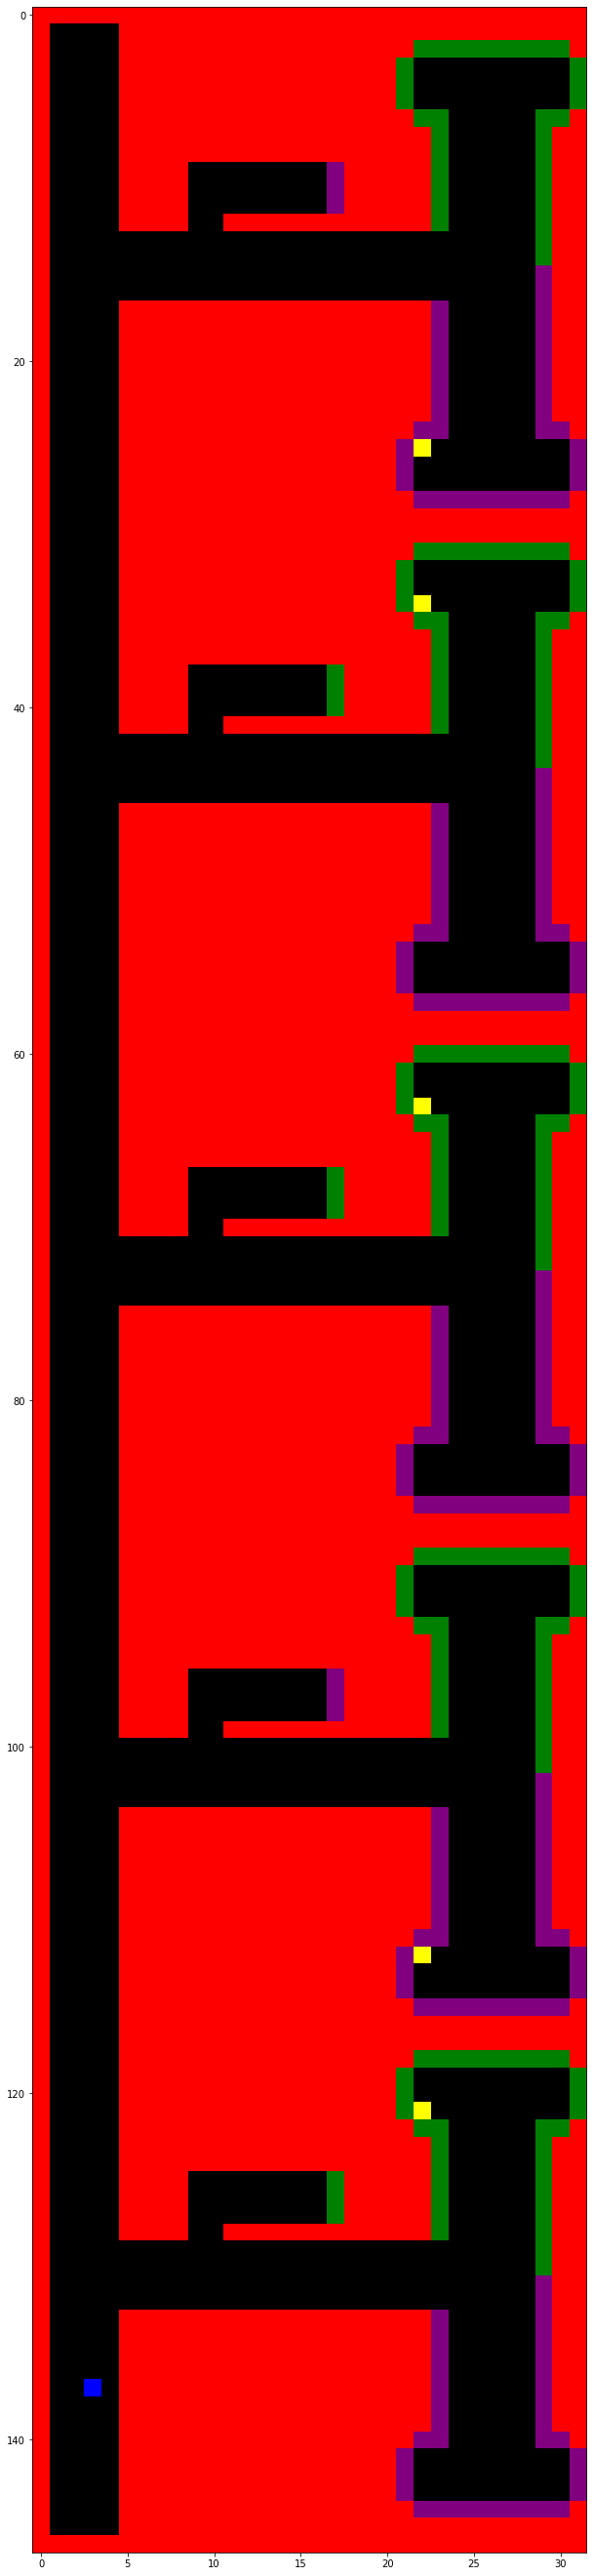

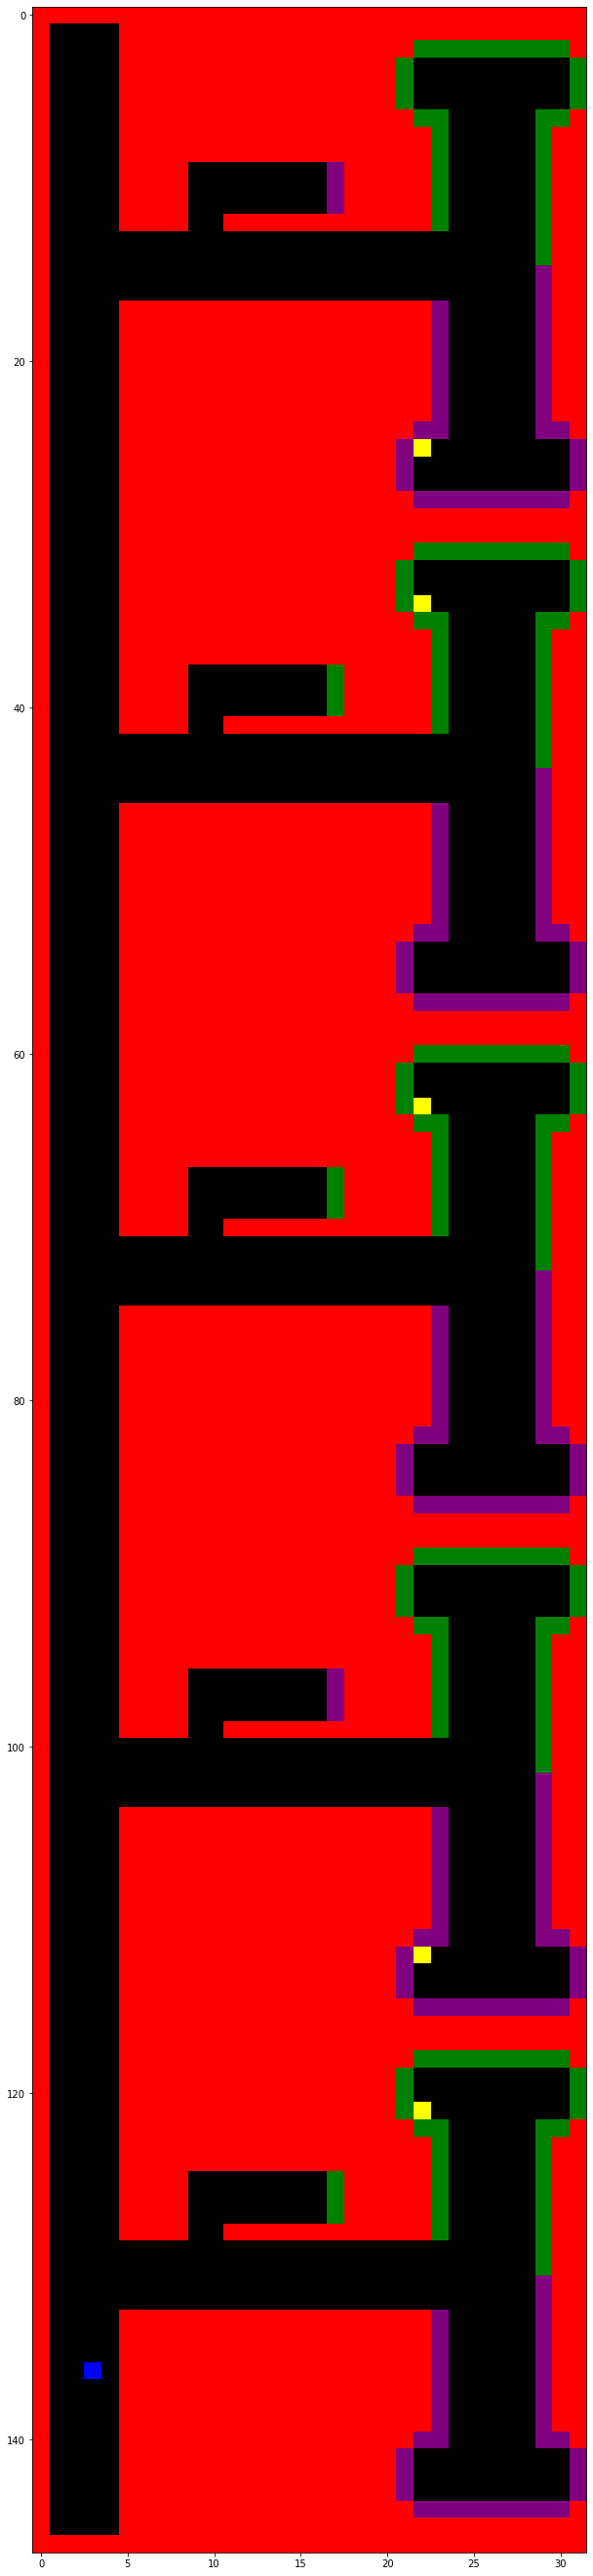

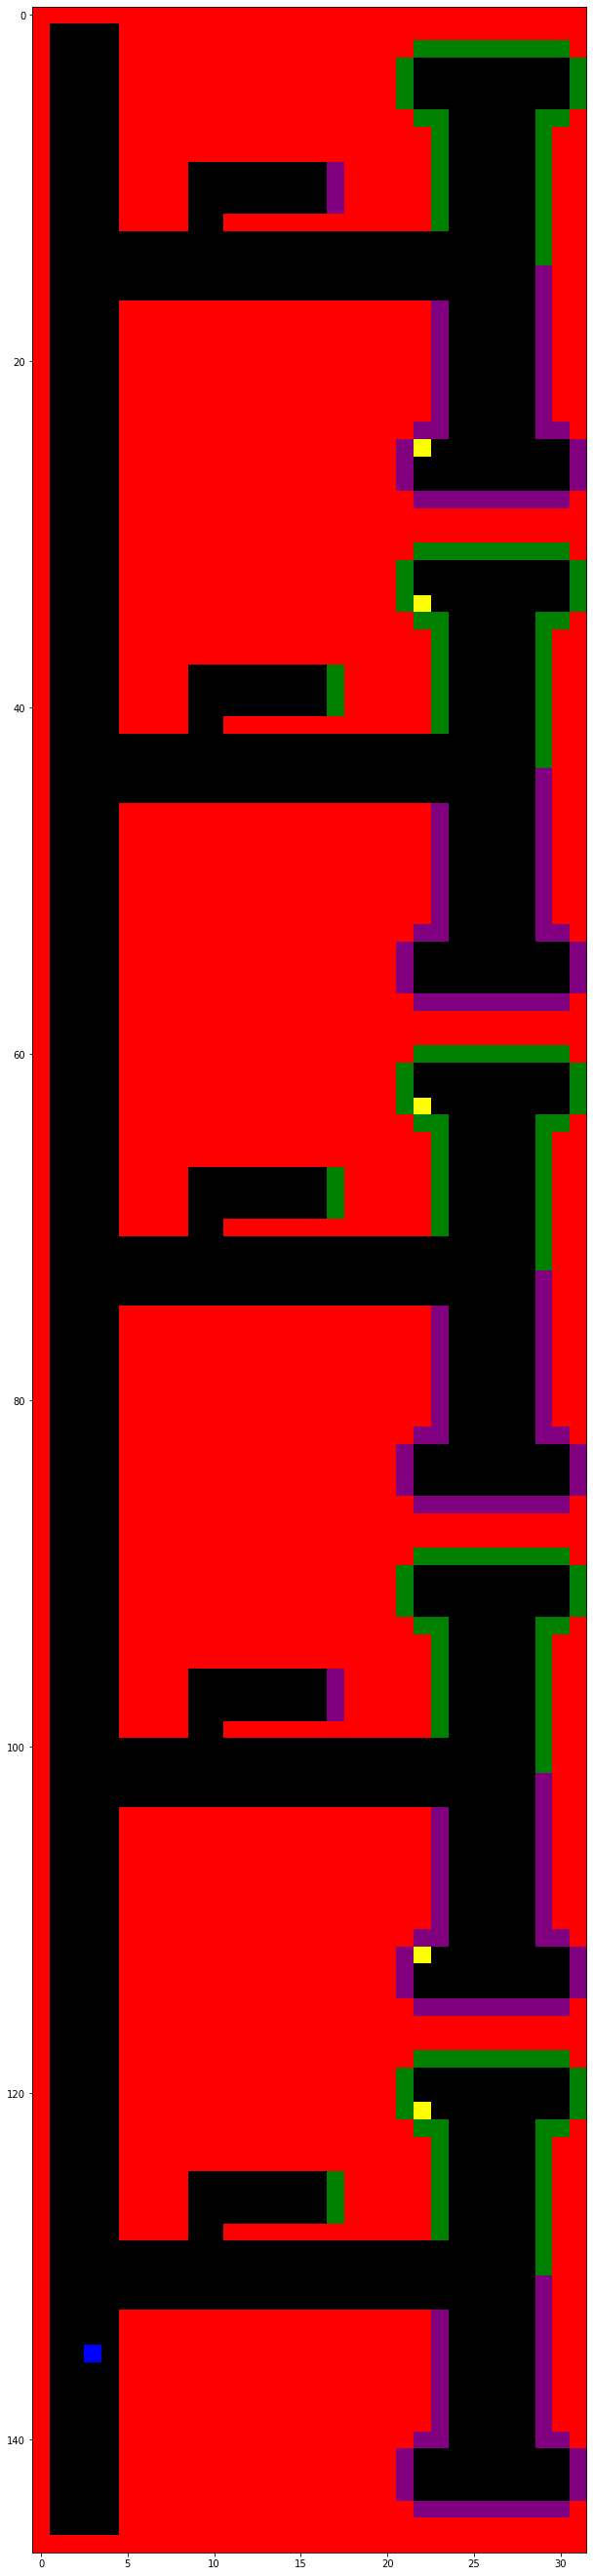

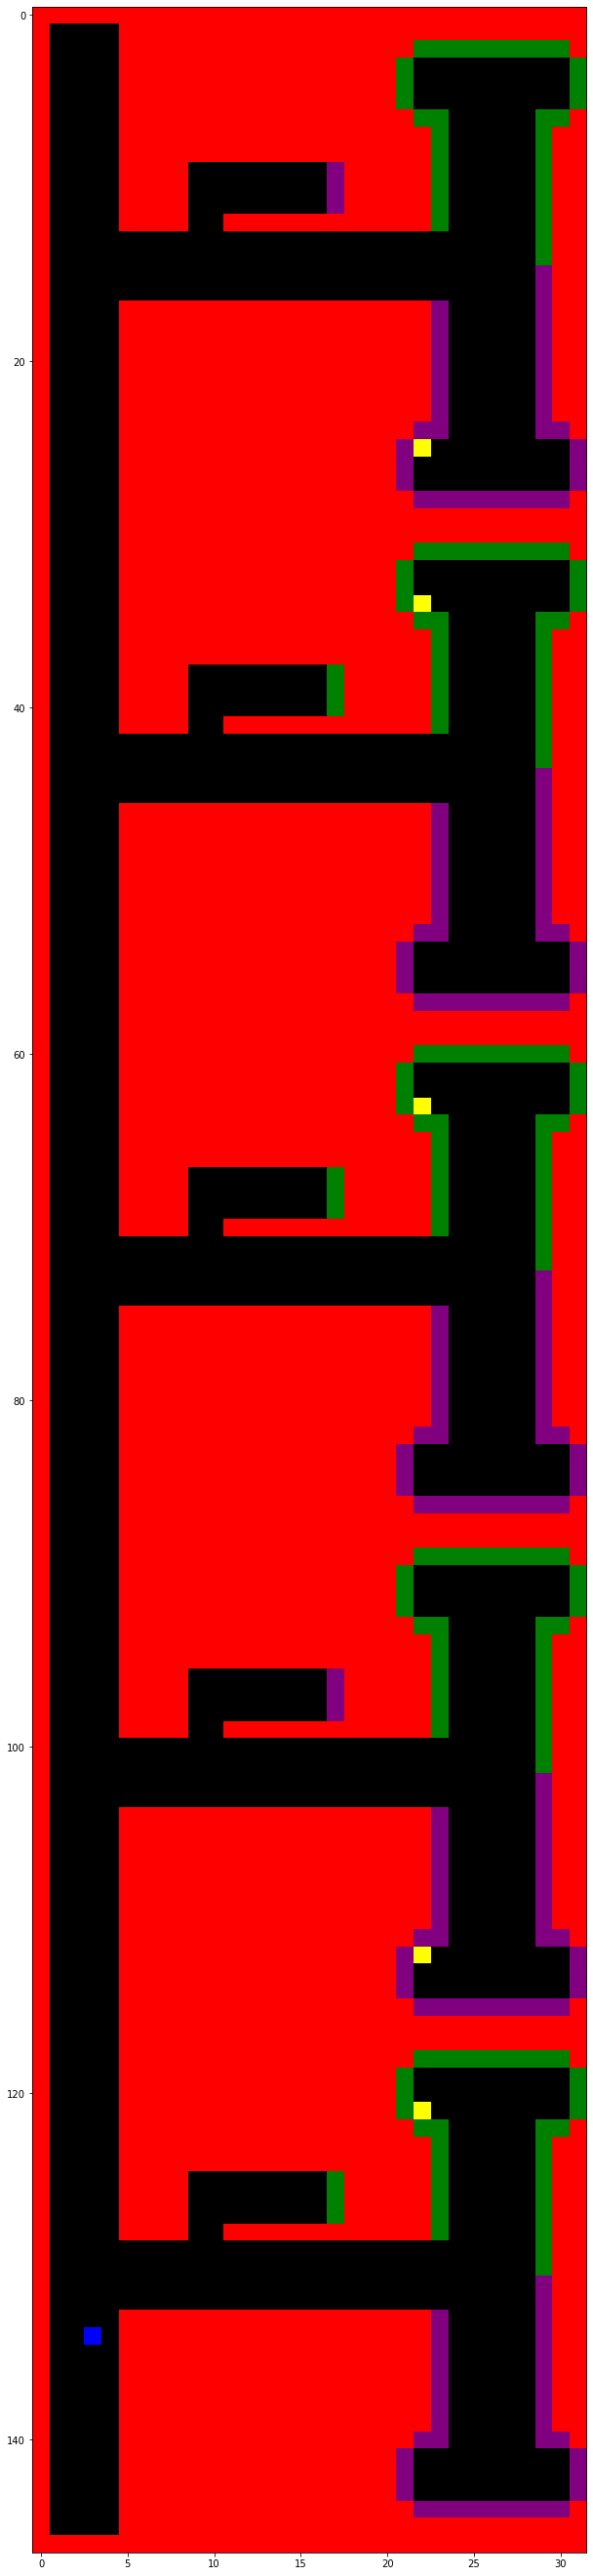

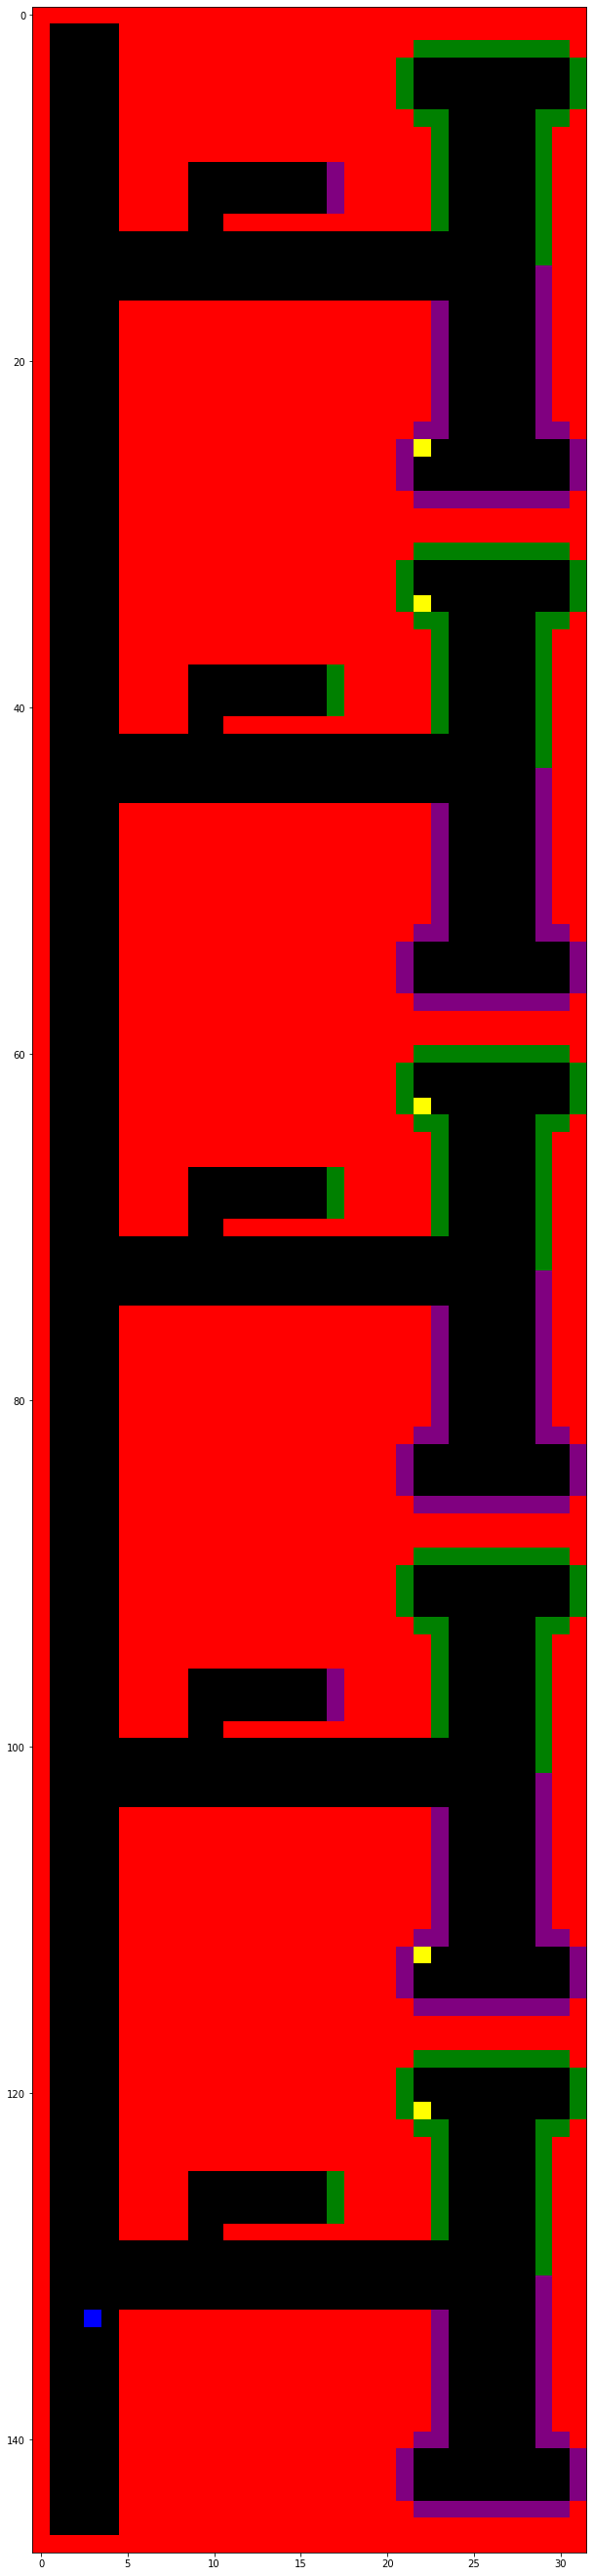

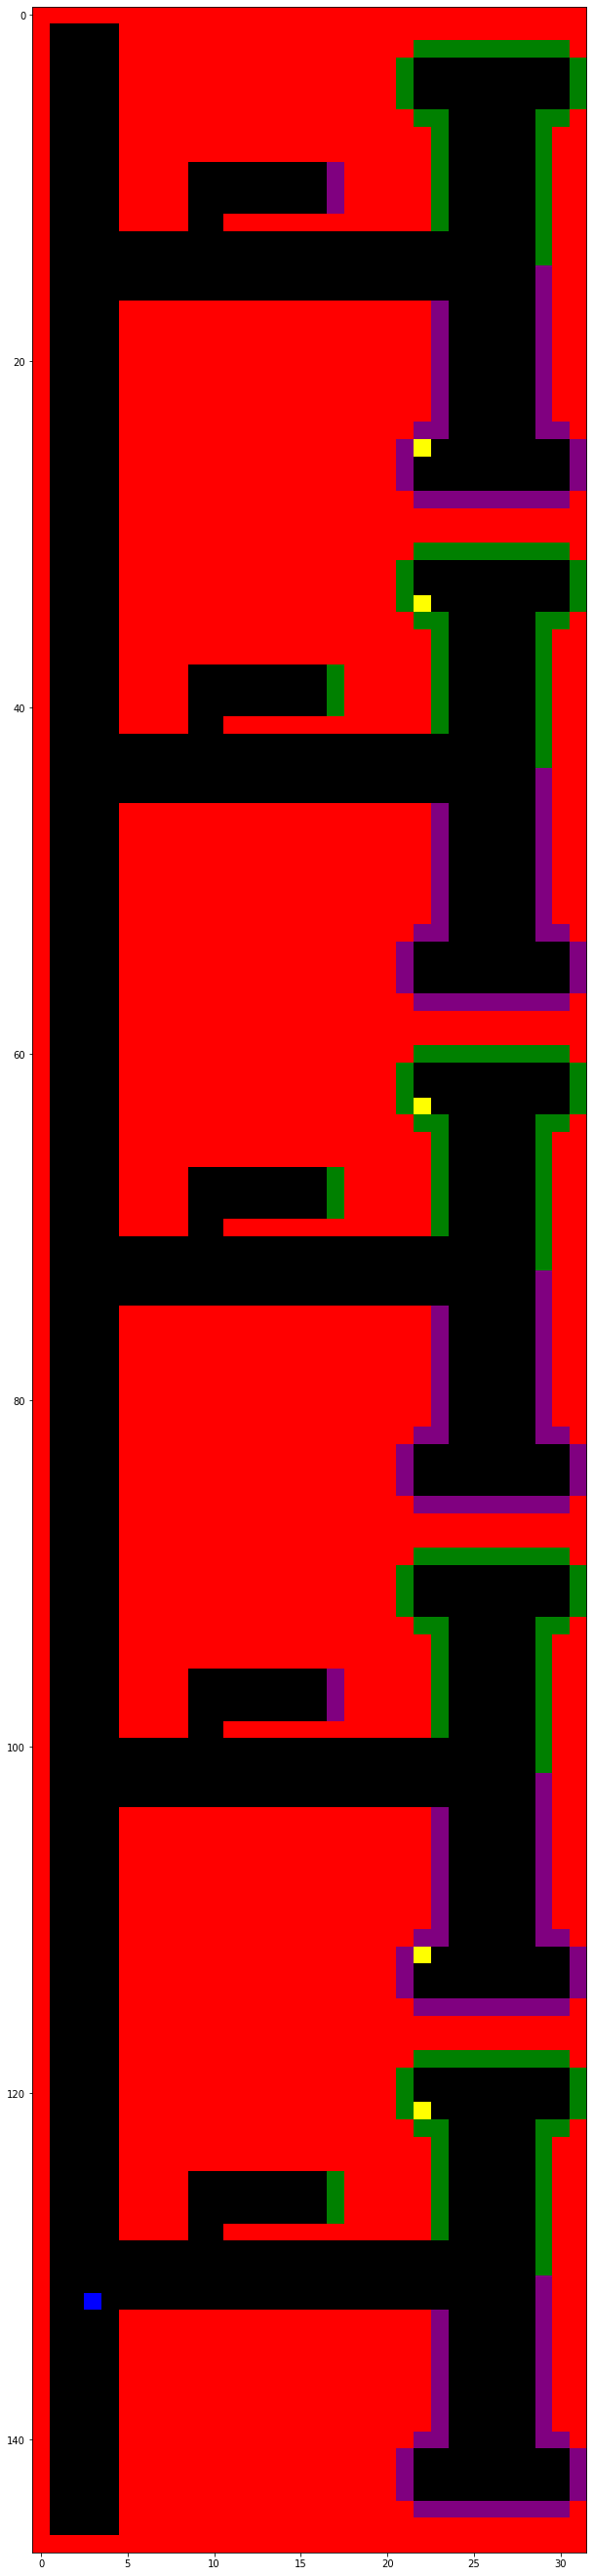

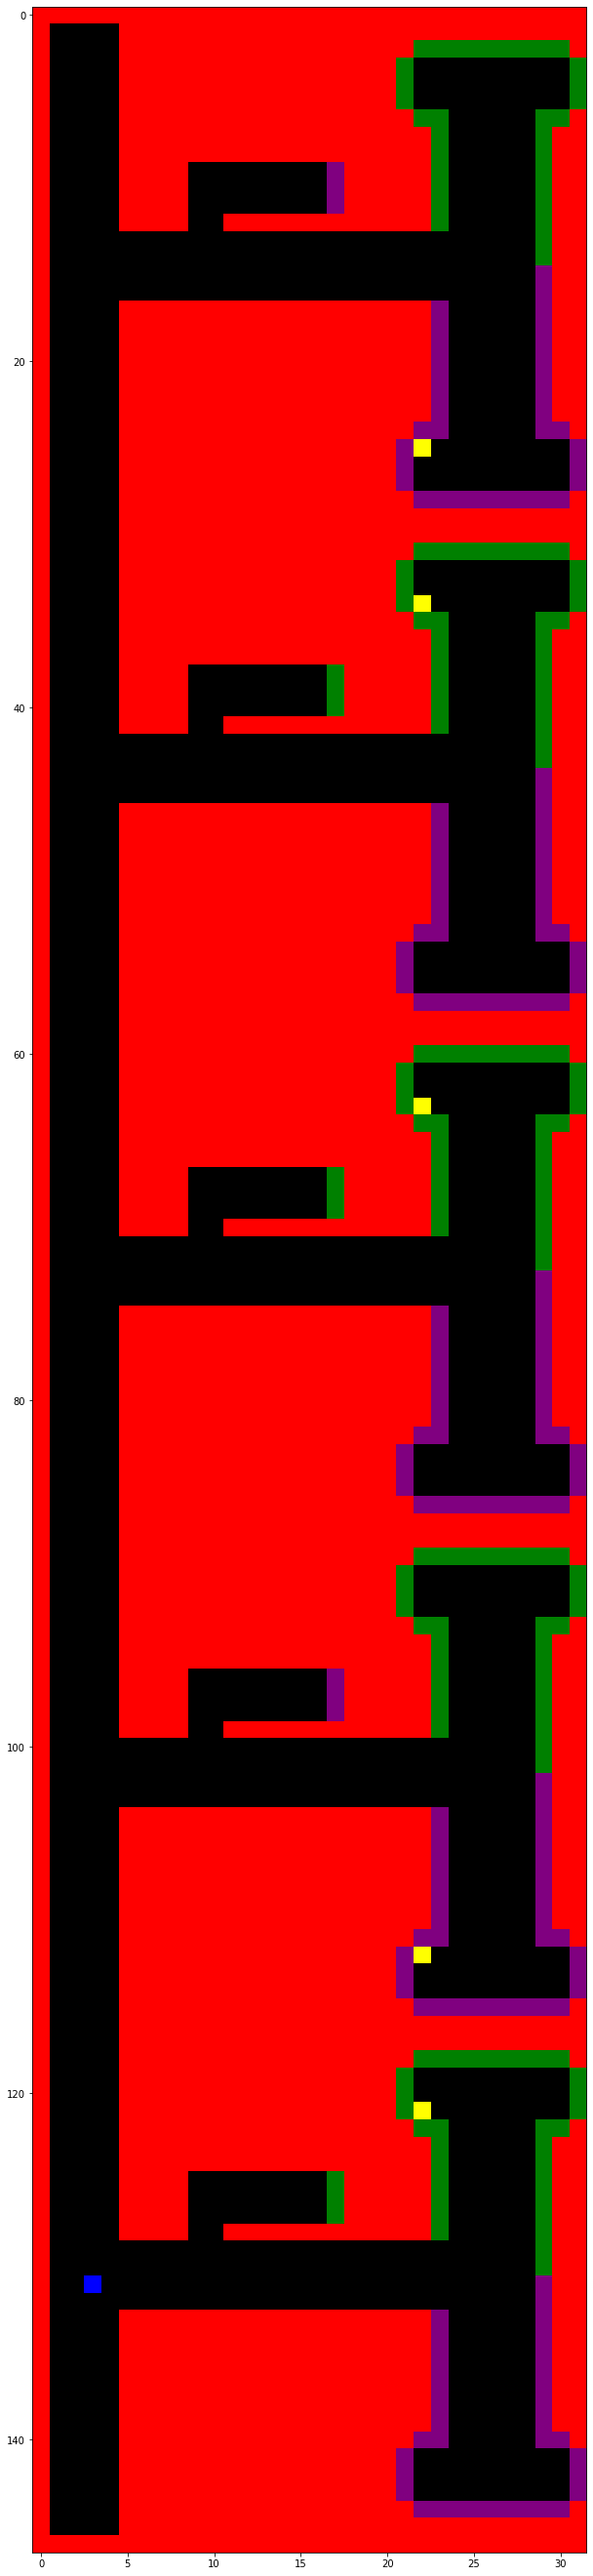

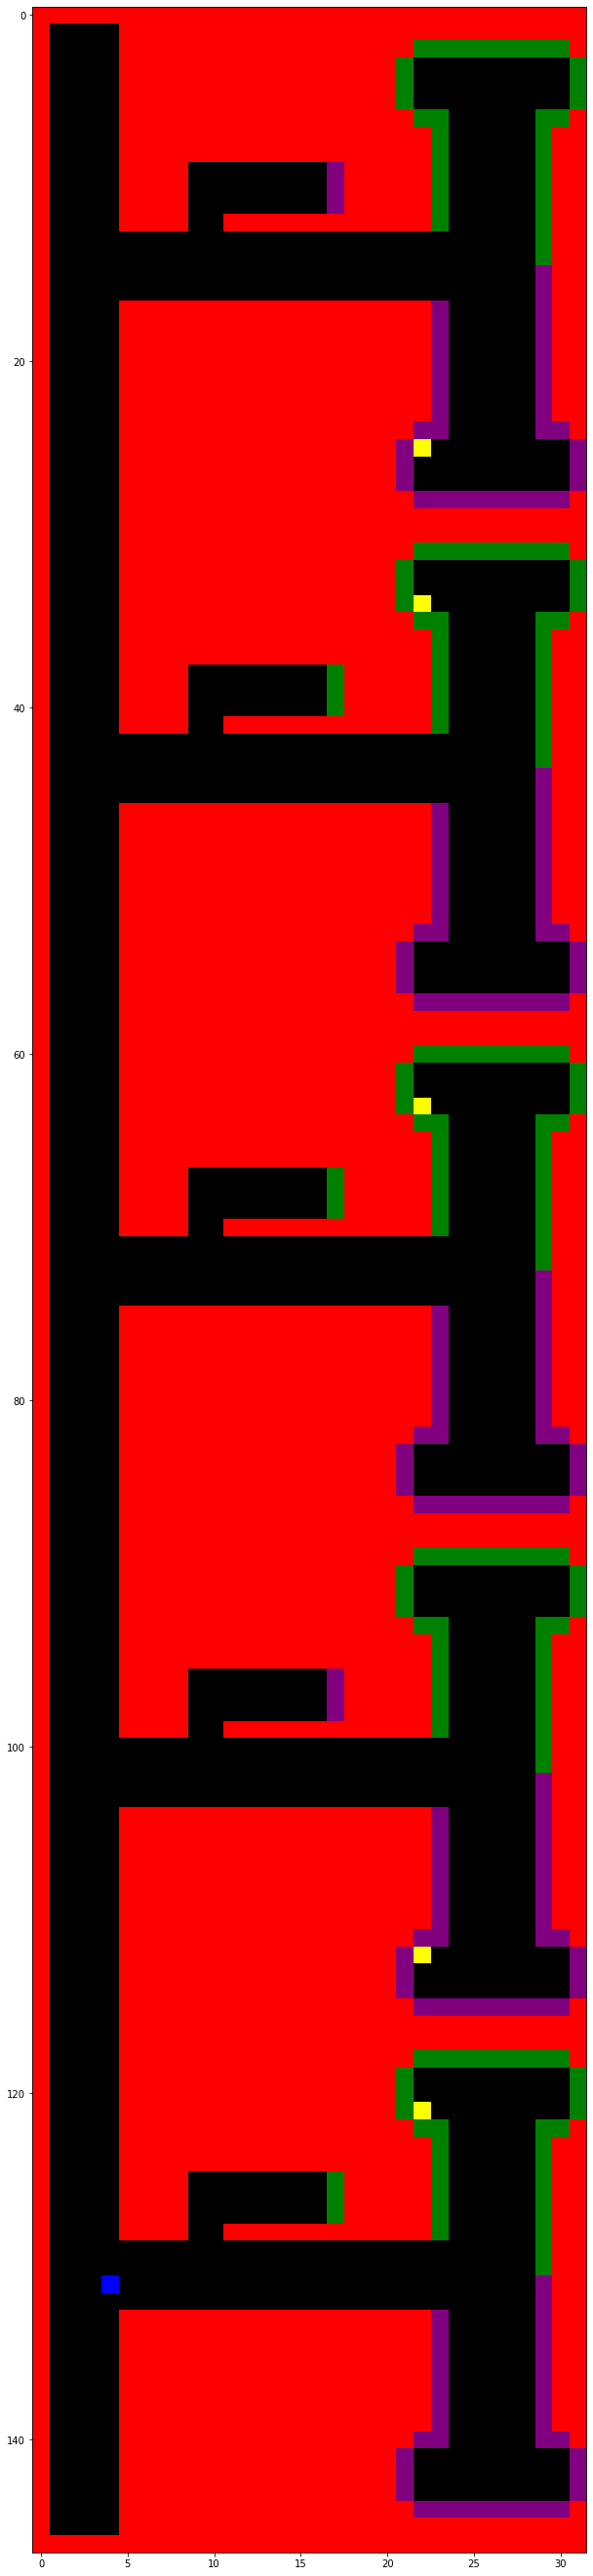

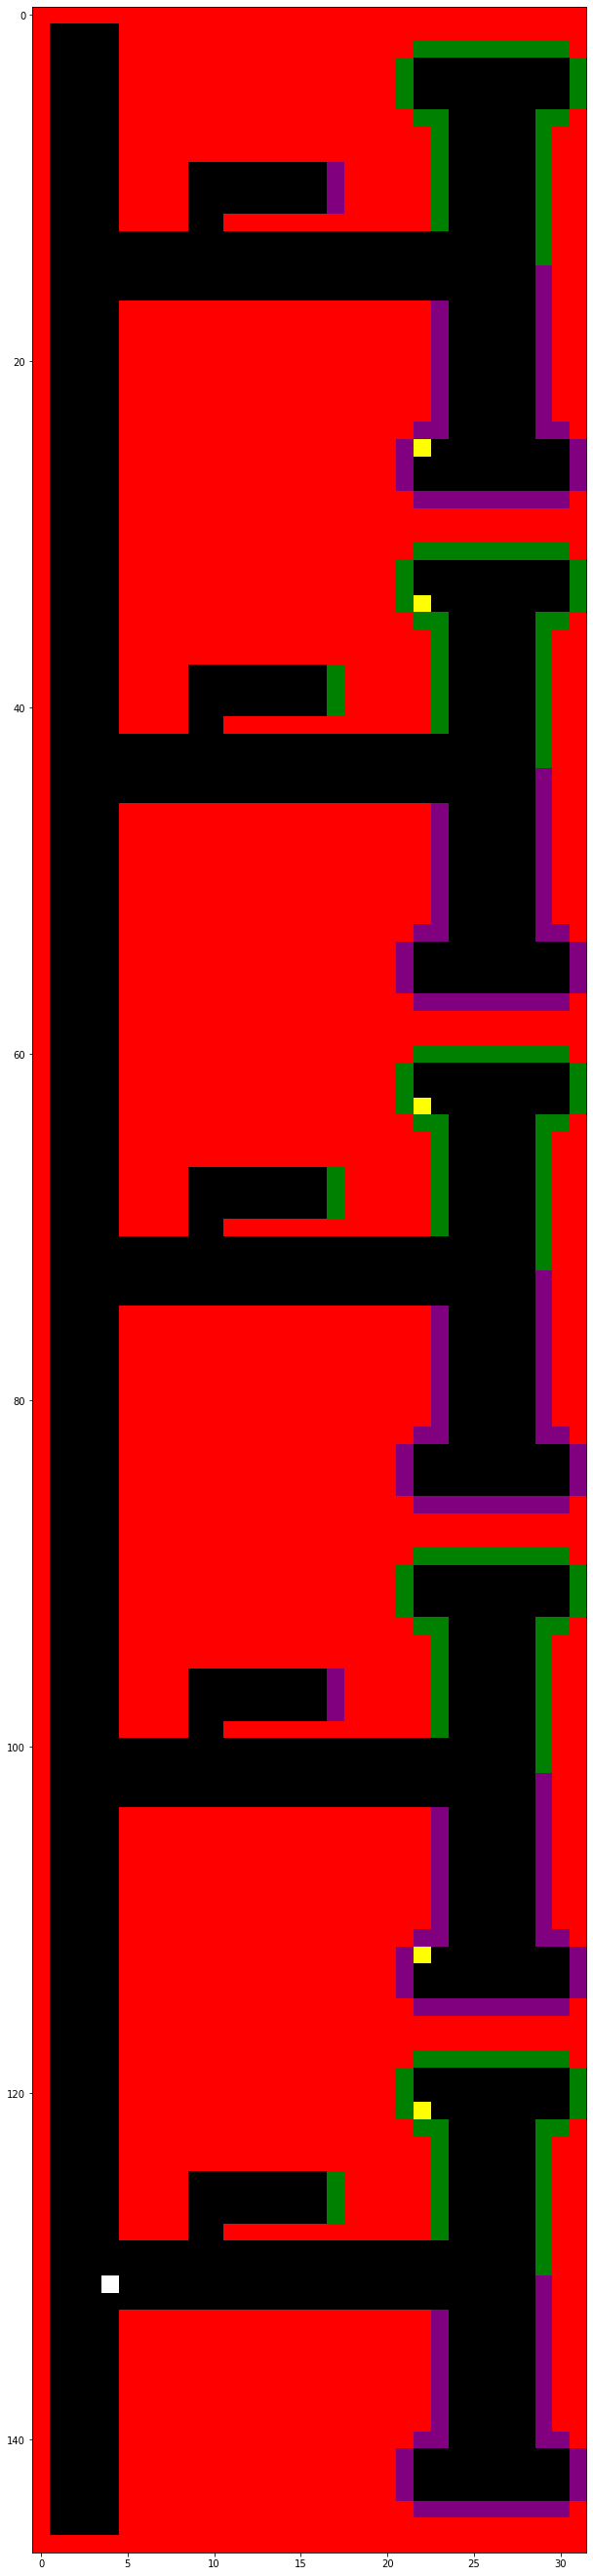

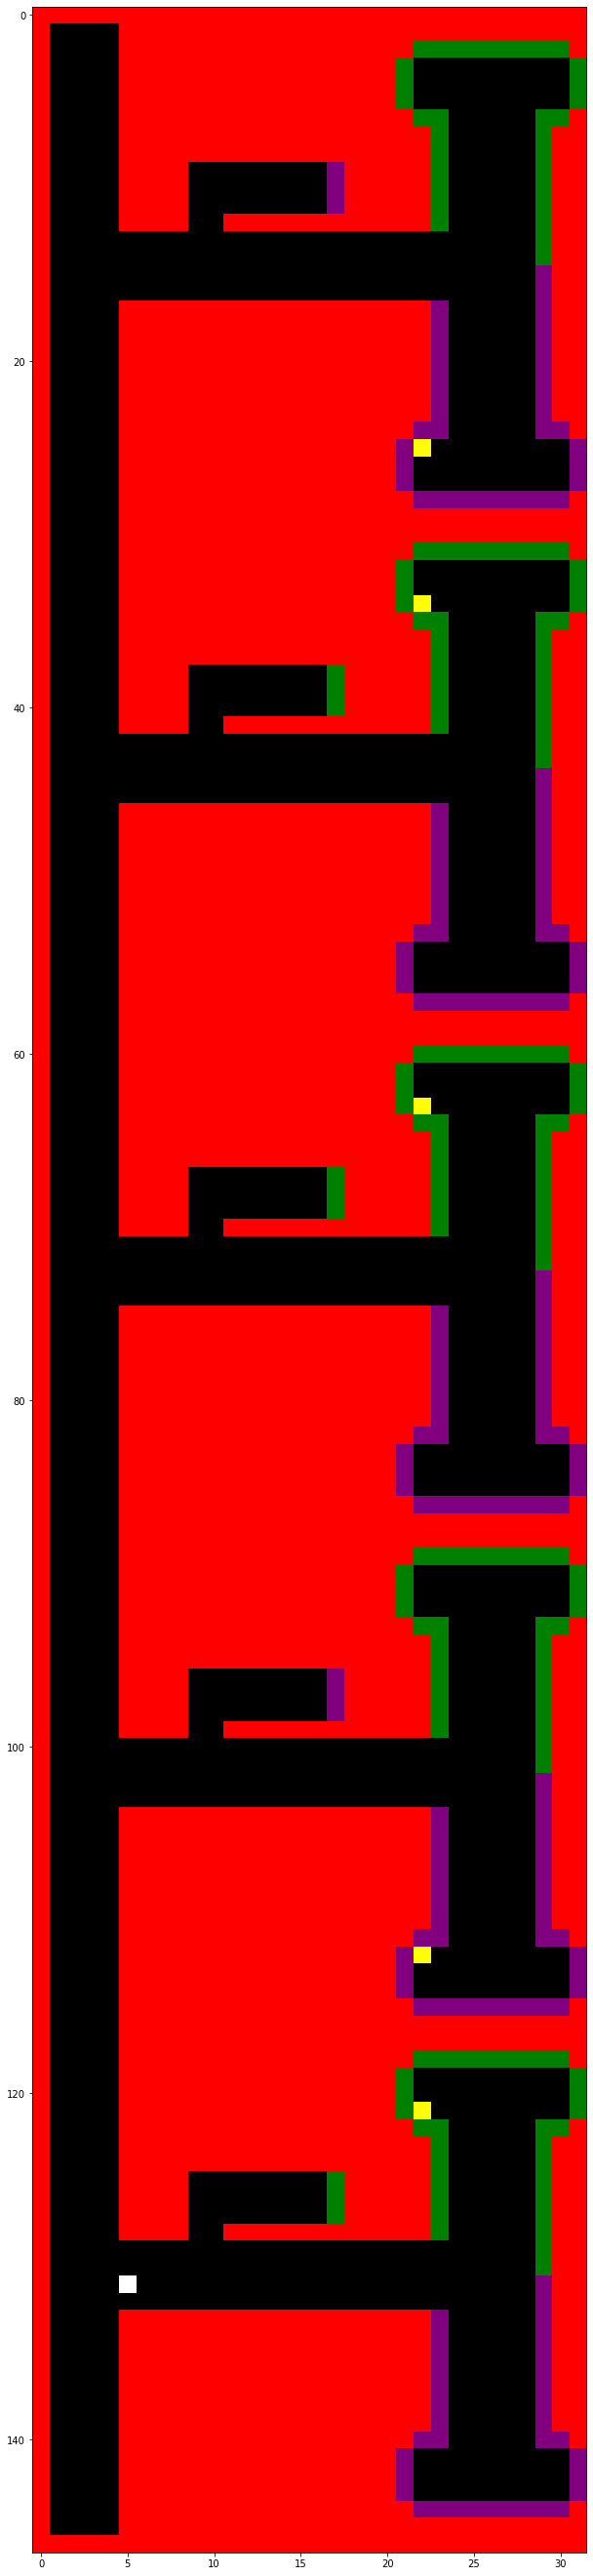

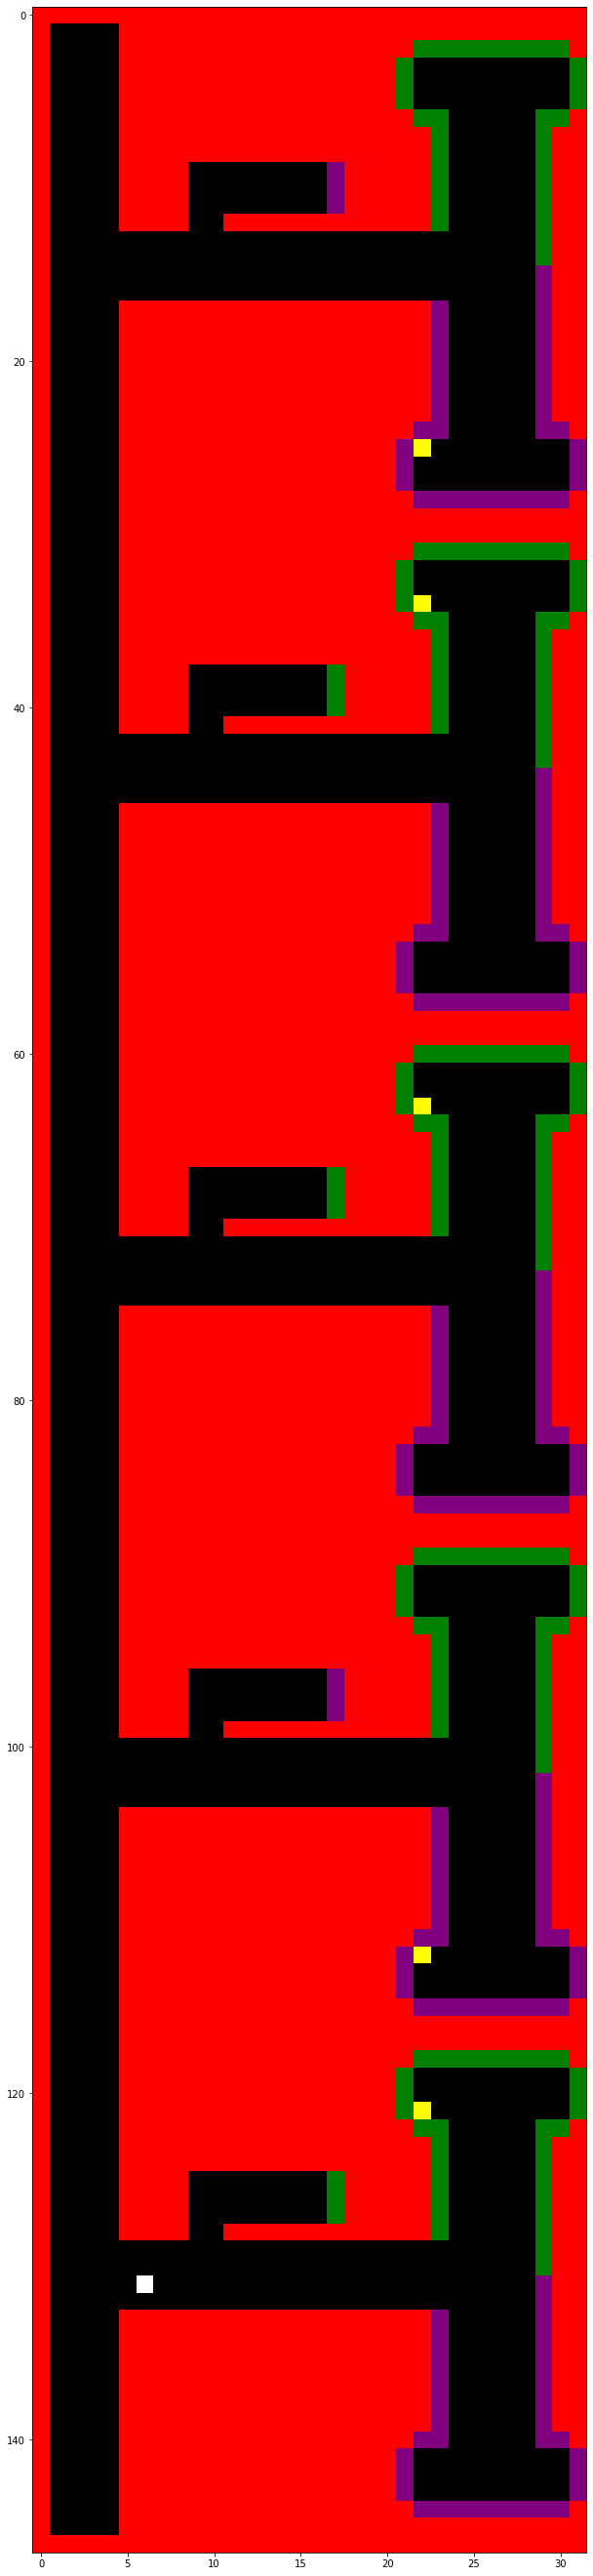

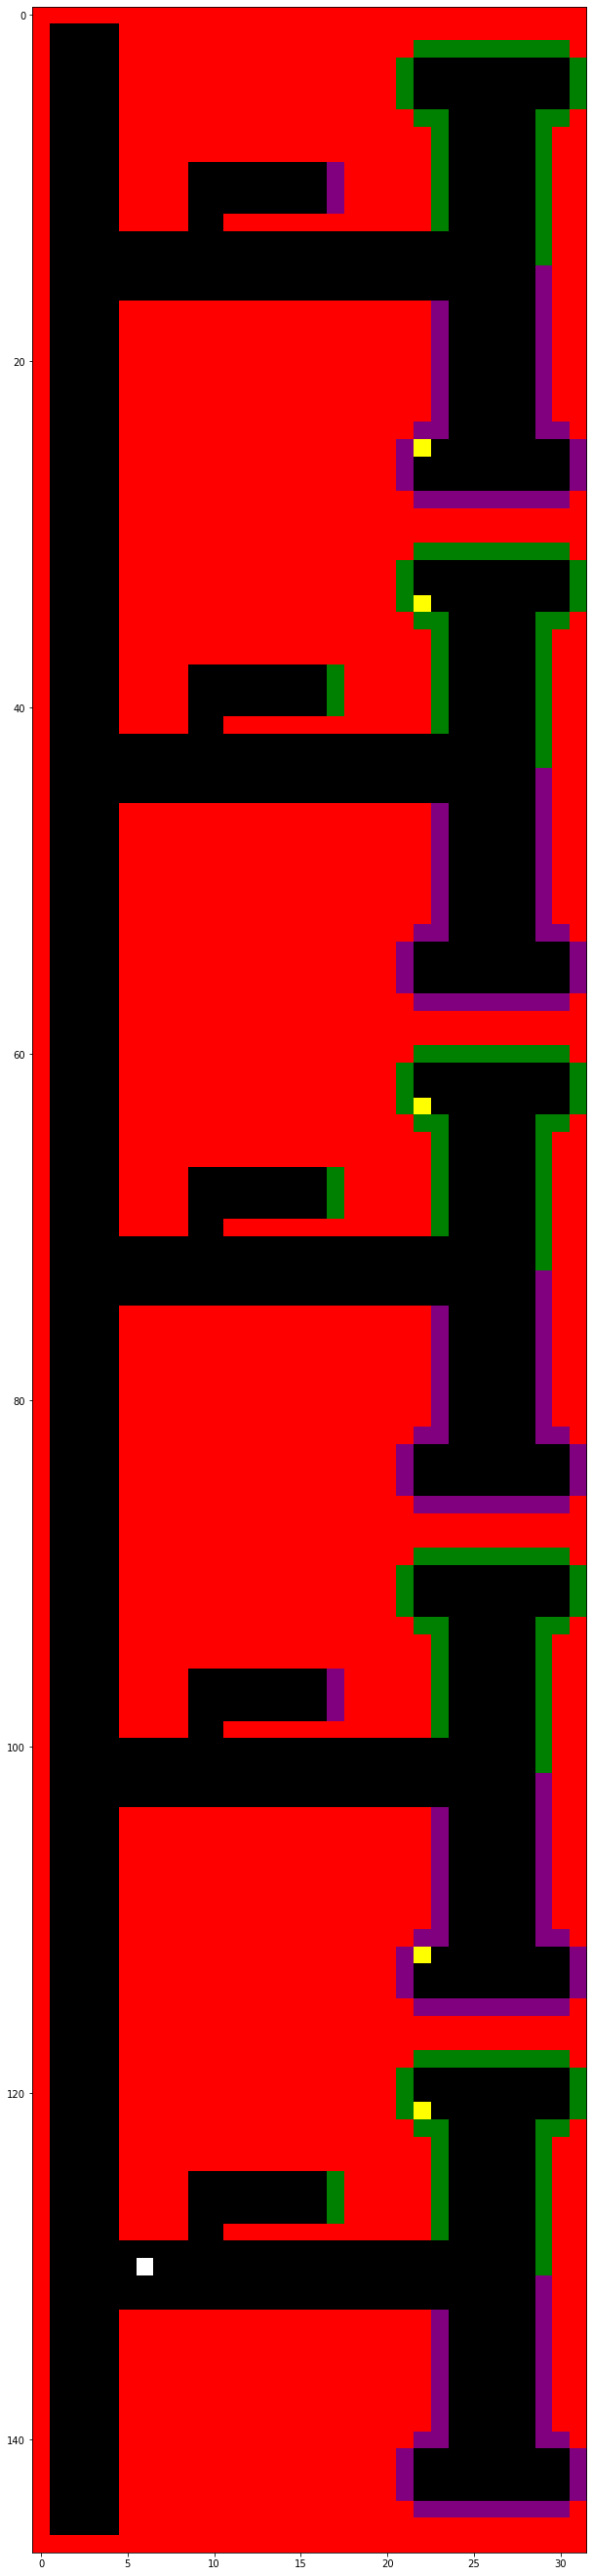

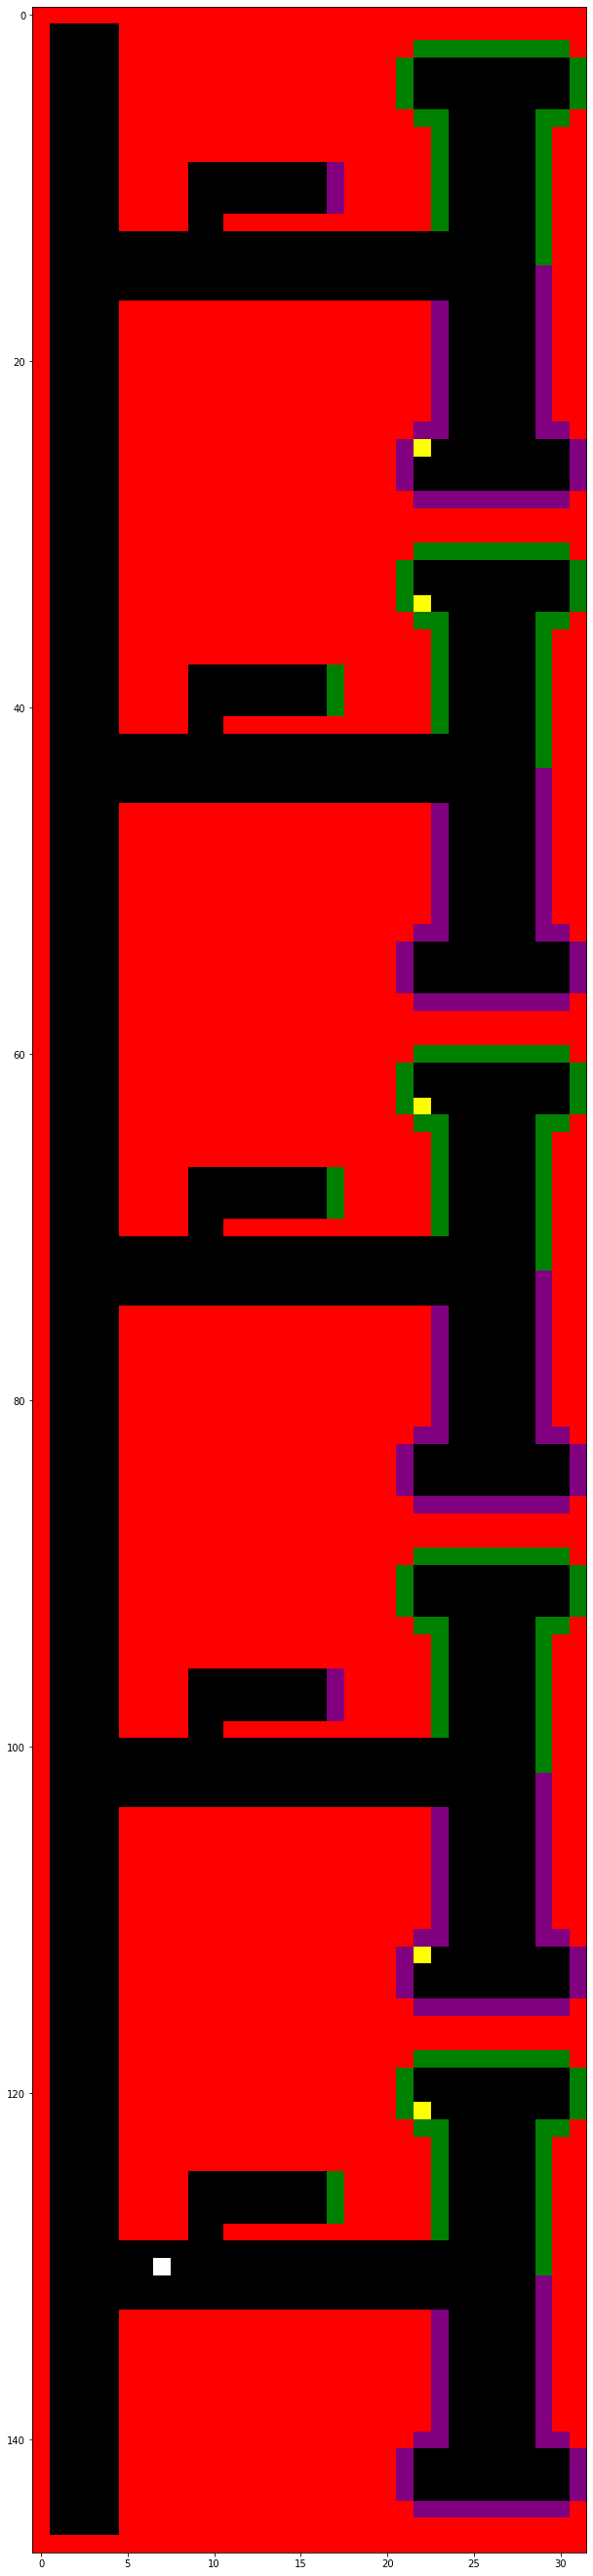

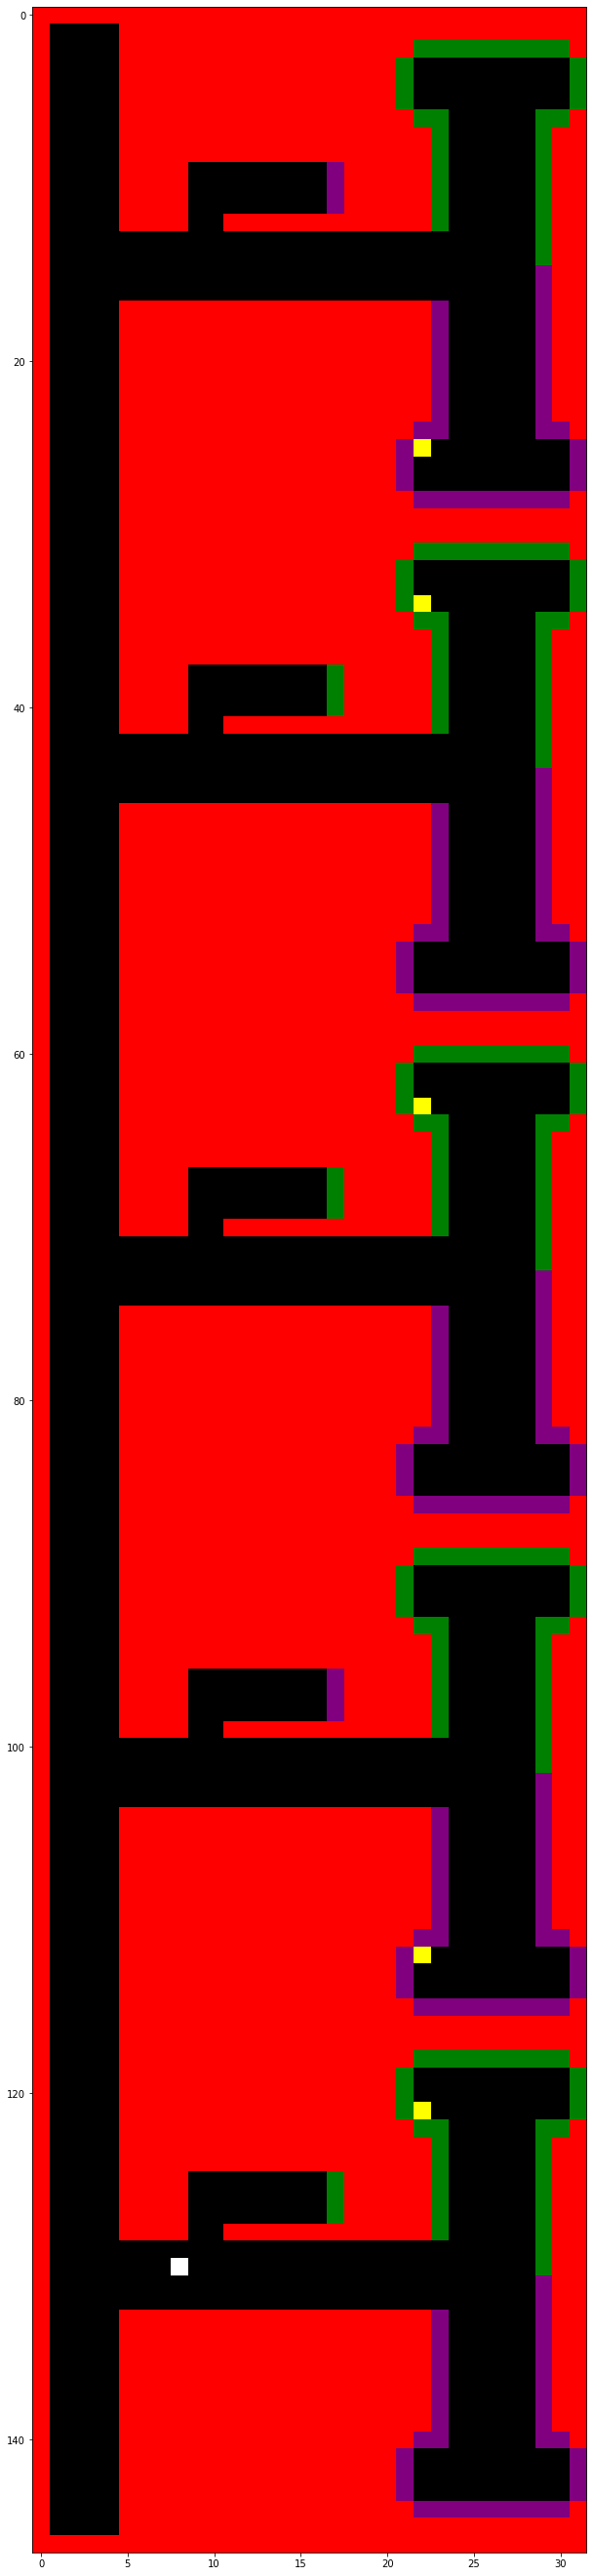

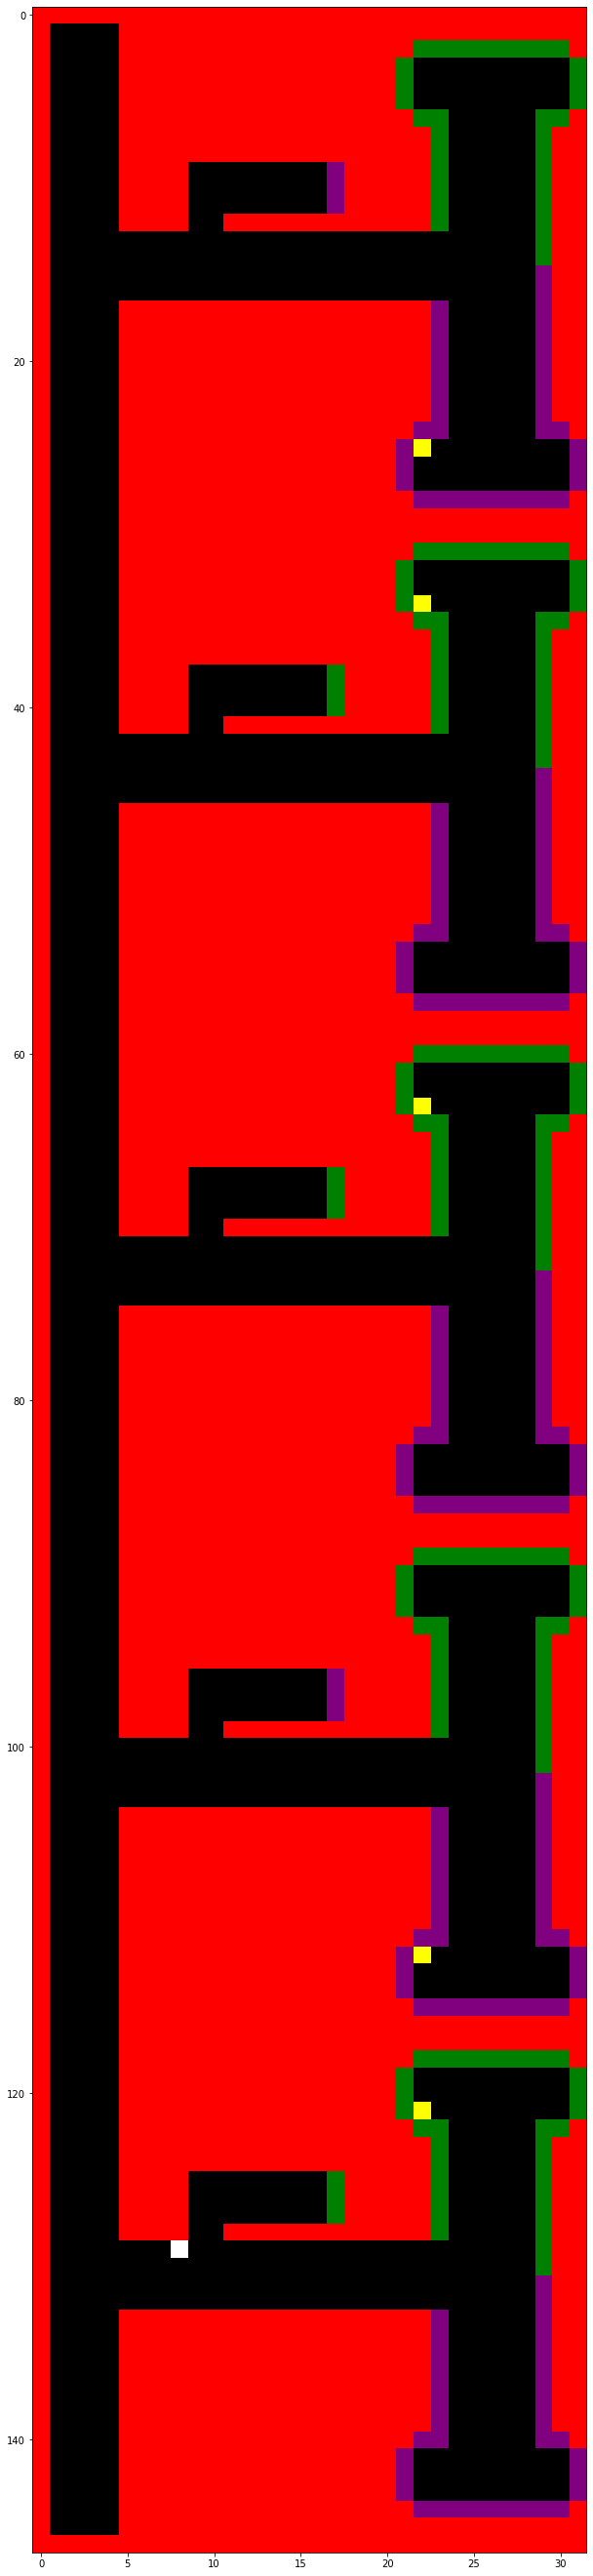

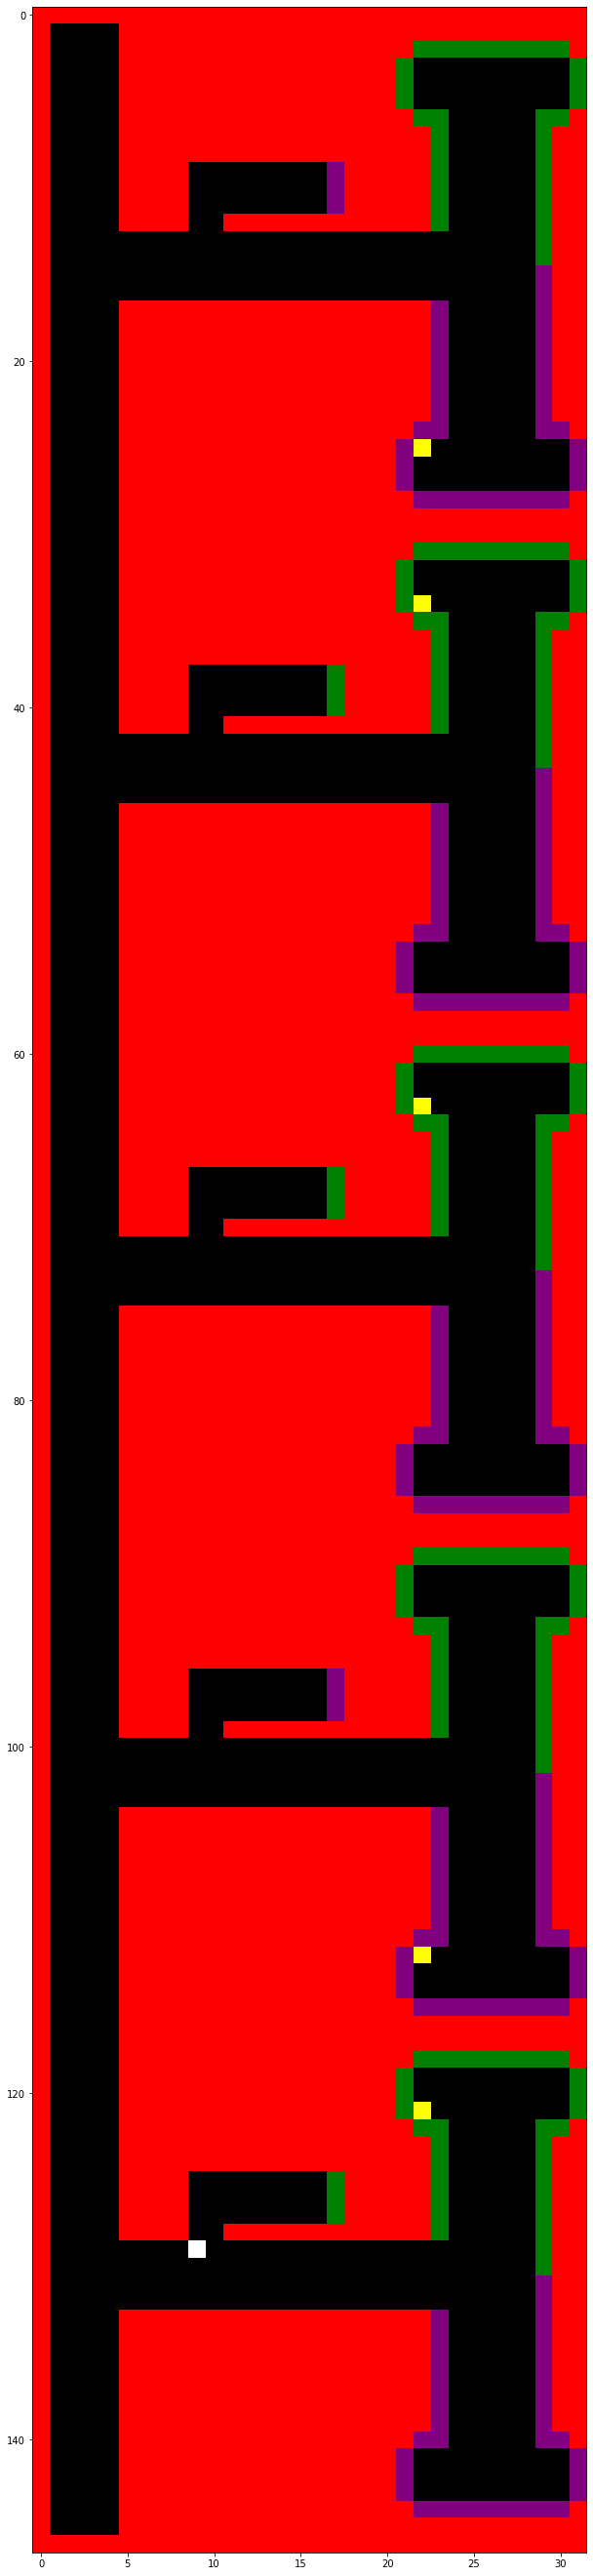

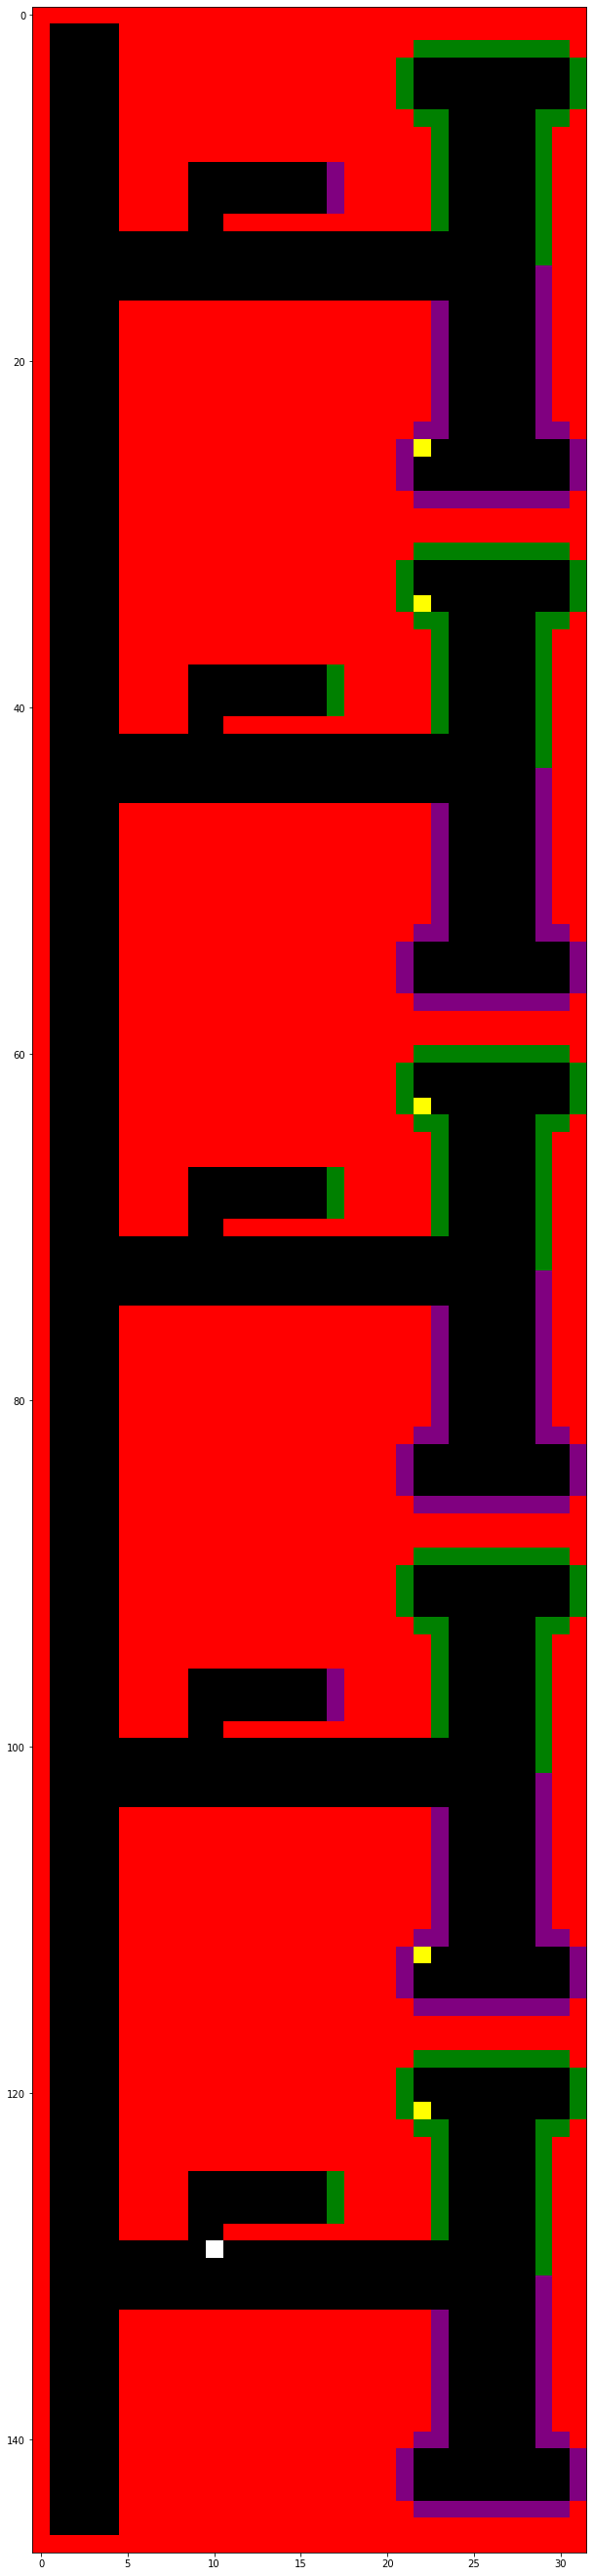

Error in callback <function flush_figures at 0x7f859105d5e0> (for post_execute):


KeyboardInterrupt: 

In [36]:
for tmap, exps in r.datas.items():
    total = None
    if(tmap == "test9"):
        for user, data in exps.items():
            print(user)
            print(len(data))
            if(user=="4832813"):
                observed_state, real_state, actions, traj, _ = data
                gen_gif(real_state)
                break



## Heatmaps Reflect

['test1', 'test2_Reflect', 'test3_Reflect', 'test4', 'test5_Reflect', 'test6', 'test1_Reflect', 'test2', 'test4_Reflect', 'test6_Reflect', 'test5', 'test3']
5588827
5
7799324
5
2900312
5
7862399
5
8023504
5
3393196
5
6312290
5
2789611
5
6272611
5
3844398
5
2954467
5
7305802
5
4297577
5
7874247
5
3062964
5


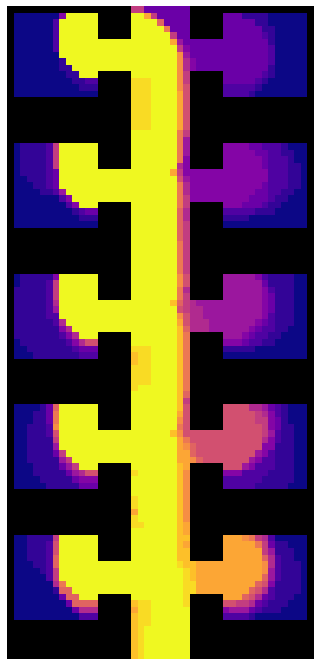

5588827
5
7799324
5
2900312
5
8023504
5
9403949
5
6312290
5
2954467
5
4297577
5
7874247
5
8620459
5
6421078
5


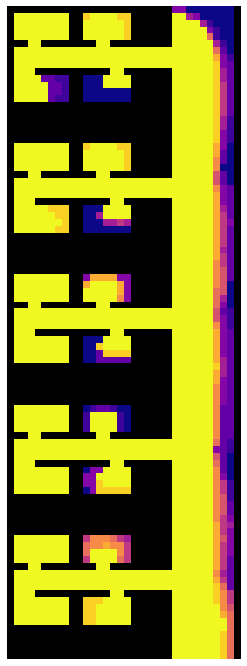

5588827
5
7799324
5
8126530
5
4276108
5
2900312
5
8023504
5
6385658
5
9403949
5
3393196
5
4625841
5
6312290
5
0812297
5
3844398
5
7106784
5
4297577
5
3842773
5
8620459
5
3062964
5


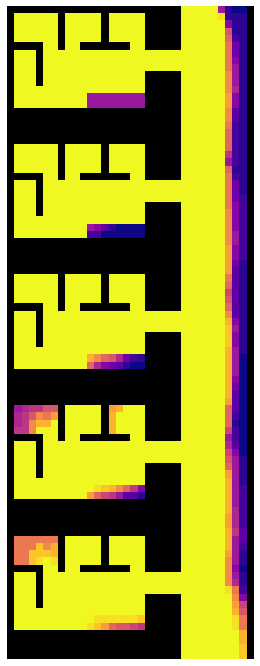

8667327
5
7799324
5
8023504
5
6385658
5
9403949
5
6312290
5
3049745
5
0812297
5
6272611
5
3844398
5
2954467
5
7305802
5
7106784
5
4297577
5
7874247
5
8620459
5


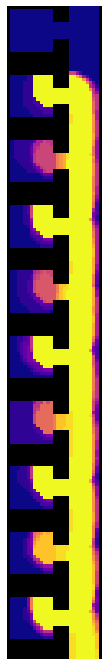

7799324
5
8126530
5
7862399
5
6385658
5
9403949
5
6312290
5
7305802
5
4297577
5
8620459
5
3062964
5
6421078
5


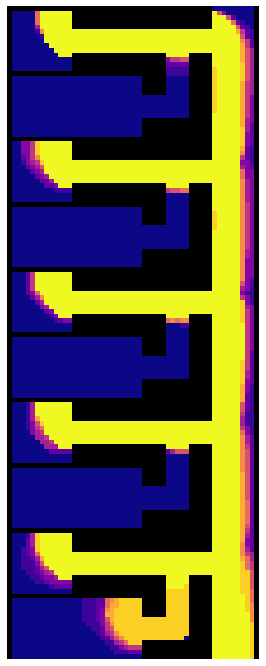

8126530
5
4276108
5
7862399
5
8023504
5
6385658
5
3393196
5
4625841
5
6312290
5
3049745
5
0812297
5
3844398
5
3842773
5
7874247
5
8620459
5
3062964
5
6421078
5


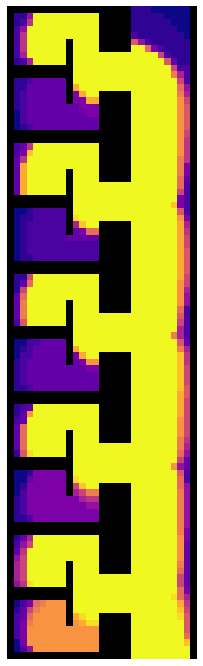

In [45]:
print(list(r.datas))
cmap =  cm.get_cmap("plasma").colors

# Heatmaps
for tmap_f, exps_f in r.datas.items():
    if("Reflect" not in tmap_f):
        total = None
        for tmap, exps in [(tmap_f, r.datas[tmap_f])]:
            for user, data in exps.items():
                print(user)
                print(len(data))
                observed_state, real_state, actions, traj, _ = data
                
                if("Reflect" in tmap):
                    print(real_state[-1].shape)
                    real_state = np.flip(real_state[-1], axis=1)
                    observed_state = np.flip(observed_state[-1], axis=1)
                    
                    print(real_state.shape)
                else:
                    real_state = real_state[-1]
                    observed_state = observed_state[-1]
                sy, sx = real_state.shape

                if(total is None):
                    total = np.zeros((sy, sx))

                unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
                wall = (real_state == np.ones(real_state.shape)*WALL)
                for syi in range(sy):
                    for sxi in range(sx):
                        if(not unobserved[syi, sxi]):
                            total[syi, sxi]+=1



        # More visible distinctions
        total = total
        total = (len(cmap)-1)*total/float(np.max(total))

        total_image = np.zeros((sy, sx, 3))
        for syi in range(sy):
            for sxi in range(sx):
                if(wall[syi, sxi]):
                    total_image[syi, sxi] = (0,0,0)
                else:
                    total_image[syi, sxi] = cmap[int(total[syi, sxi])]

        f = plt.figure(figsize=(32, 12))
        plt.imshow(total_image)
        plt.axis('off')
        plt.show()
        f.savefig("./figs/{}.pdf".format(tmap_f), bbox_inches='tight')

## Heatmaps

['test7', 'test8', 'test10', 'test12', 'test11', 'test9']
test7
keys
dict_keys(['9722382', '8349831', '9479411', '2896074', '5831456', '4887169', '8035917', '8136373', '7528739', '4574413', '8615341', '4832813', '9366516', '1456053', '4186111', '8108428'])
9722382
5
8349831
5
9479411
5
2896074
5
5831456
5
4887169
5
8035917
5
8136373
5
7528739
5
4574413
5
8615341
5
4832813
5
9366516
5
1456053
5
4186111
5
8108428
5


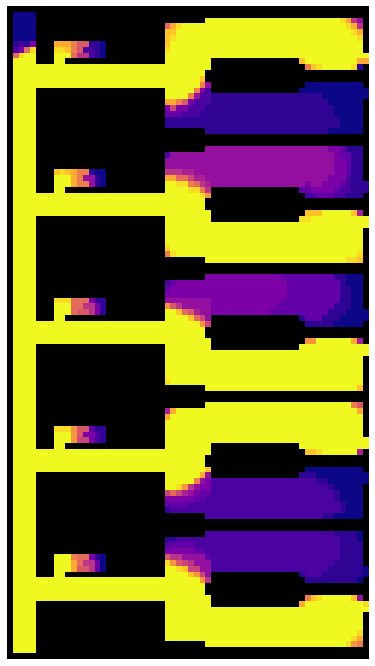

test8
keys
dict_keys(['8349831', '0686270', '4842726', '7543747', '9404362', '9188145', '2896074', '3285732', '9664366', '3499382', '4887169', '8035917', '0350283', '8136373', '7528739', '8760618', '4435465', '8615341', '4832813', '1653593', '9877970'])
8349831
5
0686270
5
4842726
5
7543747
5
9404362
5
9188145
5
2896074
5
3285732
5
9664366
5
3499382
5
4887169
5
8035917
5
0350283
5
8136373
5
7528739
5
8760618
5
4435465
5
8615341
5
4832813
5
1653593
5
9877970
5


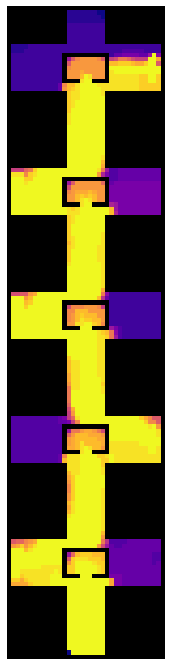

test10
keys
dict_keys(['8349831', '7543747', '9404362', '9479411', '9188145', '6333883', '2896074', '9664366', '6028768', '8136373', '3307302', '4435465', '8615341', '9366516', '1456053', '1653593'])
8349831
5
7543747
5
9404362
5
9479411
5
9188145
5
6333883
5
2896074
5
9664366
5
6028768
5
8136373
5
3307302
5
4435465
5
8615341
5
9366516
5
1456053
5
1653593
5


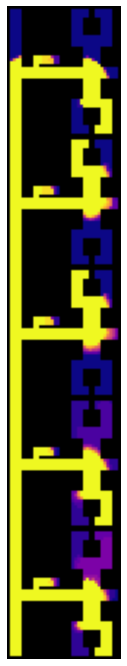

test12
keys
dict_keys(['8349831', '4020521', '0686270', '4842726', '9479411', '9188145', '2896074', '5831456', '3499382', '8035917', '0350283', '8136373', '4574413', '4435465', '4832813', '1456053', '4186111', '9877970'])
8349831
5
4020521
5
0686270
5
4842726
5
9479411
5
9188145
5
2896074
5
5831456
5
3499382
5
8035917
5
0350283
5
8136373
5
4574413
5
4435465
5
4832813
5
1456053
5
4186111
5
9877970
5


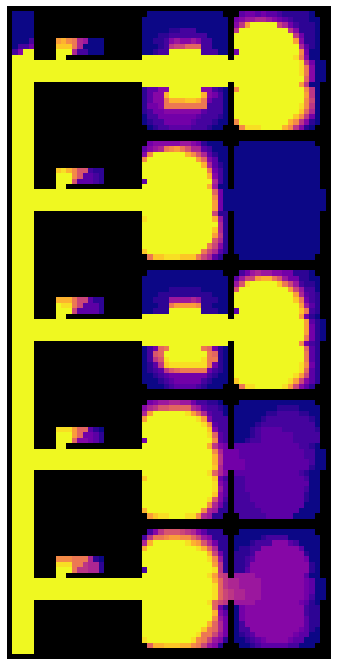

test11
keys
dict_keys(['0686270', '7543747', '9404362', '5831456', '9664366', '8035917', '3307302', '8760618', '4574413', '4832813', '9877970'])
0686270
5
7543747
5
9404362
5
5831456
5
9664366
5
8035917
5
3307302
5
8760618
5
4574413
5
4832813
5
9877970
5


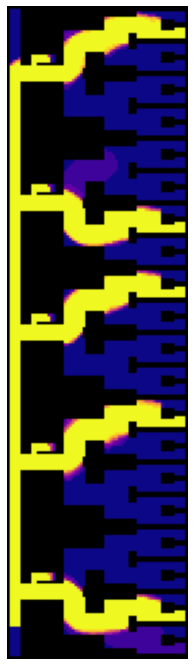

test9
keys
dict_keys(['4842726', '9404362', '6333883', '9664366', '4887169', '8035917', '8136373', '3307302', '4435465', '8615341', '9366516', '1456053', '4186111', '1653593'])
4842726
5
9404362
5
6333883
5
9664366
5
4887169
5
8035917
5
8136373
5
3307302
5
4435465
5
8615341
5
9366516
5
1456053
5
4186111
5
1653593
5


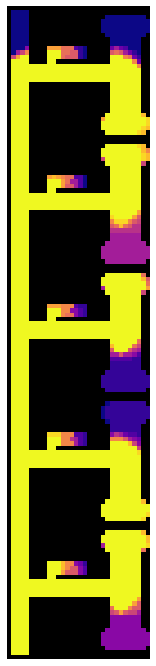

In [52]:
print(list(r.datas))
cmap =  cm.get_cmap("plasma").colors

# Heatmaps
for tmap_f, exps_f in r.datas.items():
    print(tmap_f)
    total = None
    for tmap, exps in [(tmap_f, r.datas[tmap_f])]:
        print("keys")
        print(exps.keys())
        for user, data in exps.items():
            print(user)
            print(len(data))
            observed_state, real_state, actions, traj, _ = data

            if("Reflect" in tmap):
                print(real_state[-1].shape)
                real_state = np.flip(real_state[-1], axis=1)
                observed_state = np.flip(observed_state[-1], axis=1)

                print(real_state.shape)
            else:
                real_state = real_state[-1]
                observed_state = observed_state[-1]
            sy, sx = real_state.shape

            if(total is None):
                total = np.zeros((sy, sx))

            unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
            wall = (real_state == np.ones(real_state.shape)*WALL)
            for syi in range(sy):
                for sxi in range(sx):
                    if(not unobserved[syi, sxi]):
                        total[syi, sxi]+=1



    # More visible distinctions
    total = total
    total = (len(cmap)-1)*total/float(np.max(total))

    total_image = np.zeros((sy, sx, 3))
    for syi in range(sy):
        for sxi in range(sx):
            if(wall[syi, sxi]):
                total_image[syi, sxi] = (0,0,0)
            else:
                total_image[syi, sxi] = cmap[int(total[syi, sxi])]

    f = plt.figure(figsize=(32, 12))
    plt.imshow(total_image)
    plt.axis('off')
    plt.show()
    f.savefig("./figs/{}.pdf".format(tmap_f), bbox_inches='tight')

## Reward/Observed Cell Comparison Plots

In [84]:
all_experiment_specs = load_all_experiment_specs_minio(prefix ="old2/spatial_planning/")
datas_dict = {}
print(all_experiment_specs)

Checking spec: old2/spatial_planning/spec_1633141647.4406064.pkl
old2/spatial_planning/spec_1633141647.4406064.pkl
Checking spec: old2/spatial_planning/spec_1633141735.4146216.pkl
old2/spatial_planning/spec_1633141735.4146216.pkl
Checking spec: old2/spatial_planning/spec_1633141897.691739.pkl
old2/spatial_planning/spec_1633141897.691739.pkl
Checking spec: old2/spatial_planning/spec_1633142190.1694446.pkl
old2/spatial_planning/spec_1633142190.1694446.pkl
Checking spec: old2/spatial_planning/spec_1633142266.128709.pkl
old2/spatial_planning/spec_1633142266.128709.pkl
Checking spec: old2/spatial_planning/spec_1633142302.6371946.pkl
old2/spatial_planning/spec_1633142302.6371946.pkl
Checking spec: old2/spatial_planning/spec_1633142698.434387.pkl
old2/spatial_planning/spec_1633142698.434387.pkl
Checking spec: old2/spatial_planning/spec_1633142729.9180632.pkl
old2/spatial_planning/spec_1633142729.9180632.pkl
Checking spec: old2/spatial_planning/spec_1633142817.3829415.pkl
old2/spatial_planning

Checking spec: old2/spatial_planning/spec_1633226937.751609.pkl
old2/spatial_planning/spec_1633226937.751609.pkl
Checking spec: old2/spatial_planning/spec_1633227192.0848937.pkl
old2/spatial_planning/spec_1633227192.0848937.pkl
Checking spec: old2/spatial_planning/spec_1633227868.5175042.pkl
old2/spatial_planning/spec_1633227868.5175042.pkl
Checking spec: old2/spatial_planning/spec_1633228081.0640895.pkl
old2/spatial_planning/spec_1633228081.0640895.pkl
Checking spec: old2/spatial_planning/spec_1633228196.2494822.pkl
old2/spatial_planning/spec_1633228196.2494822.pkl
Checking spec: old2/spatial_planning/spec_1633231452.8438346.pkl
old2/spatial_planning/spec_1633231452.8438346.pkl
Checking spec: old2/spatial_planning/spec_1633231475.4617846.pkl
old2/spatial_planning/spec_1633231475.4617846.pkl
Checking spec: old2/spatial_planning/spec_1633231549.414555.pkl
old2/spatial_planning/spec_1633231549.414555.pkl
Checking spec: old2/spatial_planning/spec_1633231609.5992858.pkl
old2/spatial_planni

Checking spec: old2/spatial_planning/spec_1633254912.1922474.pkl
old2/spatial_planning/spec_1633254912.1922474.pkl
Checking spec: old2/spatial_planning/spec_1633256086.073928.pkl
old2/spatial_planning/spec_1633256086.073928.pkl
Checking spec: old2/spatial_planning/spec_1633256122.0720925.pkl
old2/spatial_planning/spec_1633256122.0720925.pkl
Checking spec: old2/spatial_planning/spec_1633256128.7878044.pkl
old2/spatial_planning/spec_1633256128.7878044.pkl
Checking spec: old2/spatial_planning/spec_1633256223.602901.pkl
old2/spatial_planning/spec_1633256223.602901.pkl
Checking spec: old2/spatial_planning/spec_1633256236.932532.pkl
old2/spatial_planning/spec_1633256236.932532.pkl
Checking spec: old2/spatial_planning/spec_1633256259.026018.pkl
old2/spatial_planning/spec_1633256259.026018.pkl
Checking spec: old2/spatial_planning/spec_1633256466.7502031.pkl
old2/spatial_planning/spec_1633256466.7502031.pkl
Checking spec: old2/spatial_planning/spec_1633256586.8420022.pkl
old2/spatial_planning/s

Checking spec: old2/spatial_planning/spec_1633264042.2277117.pkl
old2/spatial_planning/spec_1633264042.2277117.pkl
Checking spec: old2/spatial_planning/spec_1633264115.1737487.pkl
old2/spatial_planning/spec_1633264115.1737487.pkl
Checking spec: old2/spatial_planning/spec_1633264153.9749193.pkl
old2/spatial_planning/spec_1633264153.9749193.pkl
Checking spec: old2/spatial_planning/spec_1633264154.1540303.pkl
old2/spatial_planning/spec_1633264154.1540303.pkl
Checking spec: old2/spatial_planning/spec_1633264458.3702083.pkl
old2/spatial_planning/spec_1633264458.3702083.pkl
Checking spec: old2/spatial_planning/spec_1633264556.782884.pkl
old2/spatial_planning/spec_1633264556.782884.pkl
Checking spec: old2/spatial_planning/spec_1633264704.8352199.pkl
old2/spatial_planning/spec_1633264704.8352199.pkl
Checking spec: old2/spatial_planning/spec_1633264997.1357245.pkl
old2/spatial_planning/spec_1633264997.1357245.pkl
Checking spec: old2/spatial_planning/spec_1633265097.0385237.pkl
old2/spatial_plan

{'old2/spatial_planning/1633141647.4406064.pkl': {'task_name': 'test2', 'exp_name': 'test2_runs_pomcp_simple', 'write_external': True, 'agent_name': 'pomcp_simple', 'search_depth': 20, 'tree_queries': 500, 'discount_factor': 0.8, 'optimism': 1e-07, 'observation_mode': 'directional_line_of_sight', 'num_iterations': 500, 'save_dir': './results/', 'replan_strat': 'every_step'}, 'old2/spatial_planning/1633141735.4146216.pkl': {'task_name': 'test2_Reflect', 'exp_name': 'test2_Reflect_runs_pomcp_simple', 'write_external': True, 'agent_name': 'pomcp_simple', 'search_depth': 20, 'tree_queries': 500, 'discount_factor': 0.8, 'optimism': 1e-07, 'observation_mode': 'directional_line_of_sight', 'num_iterations': 500, 'save_dir': './results/', 'replan_strat': 'every_step'}, 'old2/spatial_planning/1633141897.691739.pkl': {'task_name': 'test1_Reflect', 'exp_name': 'test1_Reflect_runs_pomcp_simple', 'write_external': True, 'agent_name': 'pomcp_simple', 'search_depth': 20, 'tree_queries': 500, 'discount

In [100]:
y_models = defaultdict(list)
ystd_models = defaultdict(list)
exp_version ="exp2"
remote=False
if(exp_version == "exp1"):
    exp =["test1", 
#           "test1_Reflect", 
          "test2", 
#           "test2_Reflect", 
          "test3", 
#           "test3_Reflect", 
          "test4", 
#           "test4_Reflect", 
          "test5",
#           "test5_Reflect",
          "test6", 
#           "test6_Reflect"
        ]
elif(exp_version == "exp2"):
    exp = ["test7", 
            "test8", 
            "test9", 
            "test10", 
            "test11", 
            "test12"]

for mode in ["pomcp_simple", "pomcp_ssp", "pomcp_mle"]:
    for exp_name in exp:
#         print(mode)
#         print(exp_name)
        observed_percent = [] 
        if(exp_name == "test5"):
            exp_name = "test5_Improved"
        elif(exp_name == "test5_Reflect"):
            exp_name = "test5_Reflect_Improved"
        print(mode, exp_name)
            
        cache_key = "{}-{}".format(mode, exp_name)
        if(cache_key not in datas_dict.keys()):
            if(remote):
                datas = query_specs(all_experiment_specs, lambda x: x['exp_name'] == "{}_runs10_{}".format(exp_name, mode))
            else:
                datas = [{}]
                datas[0]['states'] = [readMap("../stim/sim_exp3/{}.txt".format(exp_name))] #
                datas[0]['observed_states'] = [readMap("../stim/exp3_observed/{}_{}.txt".format(exp_name,mode))]
            try:
                data = datas[0]
            except:
                print(mode, exp_name)
            datas_dict[cache_key] = data
        else:
            data = datas_dict[cache_key]
#         print("H")
#         print(data)
        observed_state = np.array(data['observed_states'][-1])
        real_state = np.array(data['states'][-1])
#         visualize(observed_state).show()
        sy, sx = real_state.shape
    
        print(observed_state.shape)
        print(real_state.shape)
        unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
        wall = (real_state == np.ones(real_state.shape)*WALL)
        observed = 0
        total_nonwall = 0
#         print(unobserved.shape)
#         print(wall.shape)
#         print(sy)
#         print(sx)
#         print()
        
        for syi in range(sy):
            for sxi in range(sx):
                if(not unobserved[syi, sxi] and not wall[syi, sxi]):
                    observed+=1
                if(not wall[syi, sxi]):
                    total_nonwall+=1

        observed_percent.append(float(observed)/float(total_nonwall))
        y_models[mode].append(np.mean(np.array(observed_percent)))
        ystd_models[mode].append(np.std(np.array(observed_percent))/math.sqrt(len(observed_percent)))

    

pomcp_simple test7
(112, 62)
(112, 62)
pomcp_simple test8
(153, 37)
(153, 37)
pomcp_simple test9
(147, 32)
(147, 32)
pomcp_simple test10
(225, 39)
(225, 39)
pomcp_simple test11
(242, 67)
(242, 67)
pomcp_simple test12
(121, 60)
(121, 60)
pomcp_ssp test7
(112, 62)
(112, 62)
pomcp_ssp test8
(153, 37)
(153, 37)
pomcp_ssp test9
(147, 32)
(147, 32)
pomcp_ssp test10
(225, 39)
(225, 39)
pomcp_ssp test11
(242, 67)
(242, 67)
pomcp_ssp test12
(121, 60)
(121, 60)
pomcp_mle test7
(112, 62)
(112, 62)
pomcp_mle test8
(153, 37)
(153, 37)
pomcp_mle test9
(147, 32)
(147, 32)
pomcp_mle test10
(225, 39)
(225, 39)
pomcp_mle test11
(242, 67)
(242, 67)
pomcp_mle test12
(121, 60)
(121, 60)


In [101]:
y = []
ystd = []
cmap =  cm.get_cmap("plasma").colors

In [102]:
y_combined = defaultdict(lambda:[])
ystd_combined = defaultdict(lambda:[])

for tmap, exps in r.datas.items():
    print(tmap)
    observed_percent = [] 
    for user, data in exps.items():
        total = None
        observed_state, real_state, actions, traj,_ = data  
        real_state = real_state[-1]
        observed_state = observed_state[-1]
        sy, sx = real_state.shape
        unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
        wall = (real_state == np.ones(real_state.shape)*WALL)
        
#         f = plt.figure(figsize=(32, 12))
#         plt.imshow(unobserved)
#         plt.axis('off')
#         plt.show()
        
        observed = 0
        total_nonwall = 0
        print(wall.shape)
        print(unobserved.shape)
        for syi in range(sy):
            for sxi in range(sx):
                
                if(not unobserved[syi, sxi] and not wall[syi, sxi]):
                    observed+=1
                if(not wall[syi, sxi]):
                    total_nonwall+=1
        
        observed_percent.append(float(observed)/float(total_nonwall))
    y_combined[tmap.replace("_Reflect", "")].append(np.mean(np.array(observed_percent)))
    ystd_combined[tmap.replace("_Reflect", "")].append(2*np.std(np.array(observed_percent))/math.sqrt(len(exps.items())))
    

test7
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
(112, 62)
test9
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32)
(147, 32

In [103]:
print(y_combined)
y = []
ystd = []
y_models_pomcp_simple = []

for e in exp:
    y.append(np.mean(y_combined[e]))

    if(len(v)==2):
        ystd.append(math.sqrt(ystd_combined[e][0]**2+ystd_combined[e][1]**2))
    else:
        ystd.append(ystd_combined[e][0])
    
print(y)
print(ystd)


defaultdict(<function <lambda> at 0x7fb3d16a9940>, {'test7': [0.8239295125164691], 'test9': [0.9395640005891883], 'test12': [0.8095867283270939], 'test8': [0.8616777088006677], 'test10': [0.8082502064225301], 'test11': [0.631211671612265]})
[0.8239295125164691, 0.8616777088006677, 0.9395640005891883, 0.8082502064225301, 0.631211671612265, 0.8095867283270939]
[0.024110823099332112, 0.011369291352144251, 0.0054198204407376405, 0.009287054111121787, 0.006482945440168211, 0.02119207194473703]


In [104]:
print(cmap[int(0*lm/3)])
print(ystd_models['pomcp_simple'])
print(y_models['pomcp_simple'])
print(x-0.3)

[0.050383, 0.029803, 0.527975]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.9474509803921569, 0.972768532526475, 0.9721973094170404, 1.0, 0.9410089020771514, 0.9786072909845012]
[-0.3  0.7  1.7  2.7  3.7  4.7]


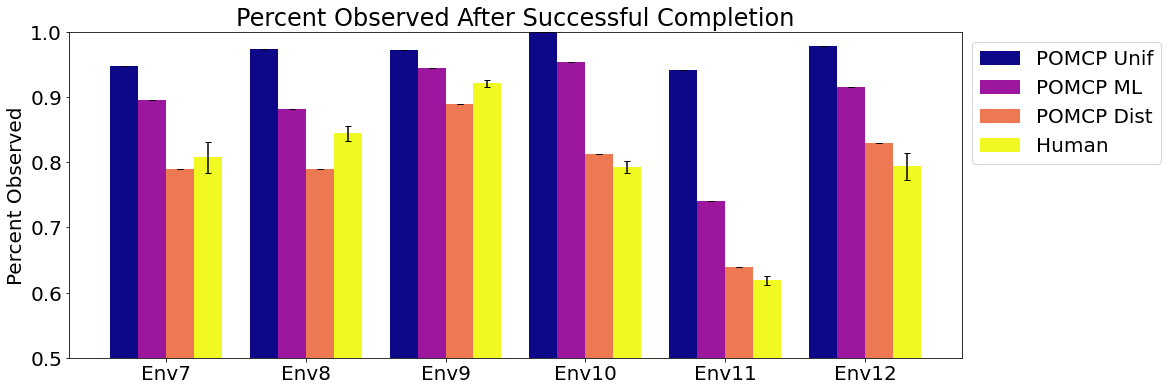

In [105]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
f = plt.figure(figsize=(16, 6))
x = np.array(list(range(len(y_models['pomcp_simple']))))
ax = plt.subplot(111)
lm = len(cmap)-1
x_labels = np.array(list(y))
ax.bar(x-0.3, y_models['pomcp_simple'], yerr=ystd_models['pomcp_simple'], width=0.2, color=cmap[int(0*lm/3)], align='center', capsize=3)
ax.bar(x-0.1, y_models['pomcp_mle'], yerr=ystd_models['pomcp_mle'], width=0.2, color=cmap[int(1*lm/3)], align='center', capsize=3)
ax.bar(x+0.1, y_models['pomcp_ssp'], yerr=ystd_models['pomcp_ssp'], width=0.2, color=cmap[int(2*lm/3)], align='center', capsize=3)
ax.bar(x+0.3, [yi*0.98 for yi in y ], yerr=ystd, width=0.2, color=cmap[int(3*lm/3)], align='center', capsize=3)
plt.xticks(x, x_labels)

plt.ylabel("Percent Observed")
plt.legend(["POMCP Unif", "POMCP ML", "POMCP Dist", "Human"], bbox_to_anchor=(1, 1))
plt.ylim([0.5, 1.0])
plt.title("Percent Observed After Successful Completion")
if(exp_version == "exp1"):
    tick_labels_env = ["Env1", "Env2", "Env3", "Env4", "Env5", "Env6"] 
else:
    tick_labels_env = ["Env7", "Env8", "Env9", "Env10", "Env11", "Env12"] 
plt.xticks(x, [i for i in tick_labels_env])
plt.show()
f.savefig("./figs/{}.pdf".format(exp_version), bbox_inches='tight')

In [ ]:
print(len(y_models['pomcp_simple']))
print(x)

## Within-environment behavioral analysis 

256
[0.9321879553181156, 0.9228387566779991, 0.9093006313744535, 0.8831957260806217, 0.7194026226323459]
[0.024052386796775144, 0.02975489159752557, 0.03152252904743779, 0.03780009699890079, 0.04153844884565364]
[0.9362437765074684, 0.9028213166144201, 0.8628526645768025, 0.8469020837174995, 0.705513553383736]
[0.017921806744281715, 0.02895209415846113, 0.04754933947506112, 0.04730508577730056, 0.037589743178774754]
[0.9525655832370895, 0.8921795083319585, 0.8482923609965354, 0.8434251773634714, 0.8225540339877907]
[0.01398135368248027, 0.025076451570249337, 0.042781963719314184, 0.043192475995959254, 0.04276104901212106]
[0.9451453135221007, 0.92430613961312, 0.9099149612185776, 0.9115970470049529, 0.8848705728436596]
[0.02178174813890785, 0.020089159543438137, 0.024436085878148165, 0.03467769470474315, 0.03513606320578171]
[0.8988282557750251, 0.691563441580181, 0.6295279544693674, 0.6117843990626047, 0.5475728155339805]
[0.04262445093470489, 0.03952035066199964, 0.036898110399201475

Text(0.5, 1.0, 'Human Few-Shot Map Learning')

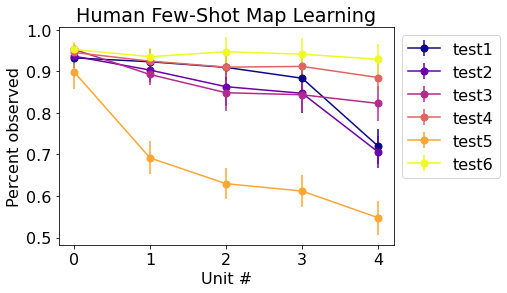

In [84]:
# Divide state into 
num_units = 5

x_labels = np.array(list(r.datas.keys()))
y = []
ystd = []

units_percent_envs = []
untis_percent_stds_envs = []
for tmap, exps in r.datas.items():
    if(not "Reflect" in tmap):
        units_percent = []
        units_percent_stds = []
        for unit_index in range(num_units):
            unit_observed_percent = [] 
            for user, data in exps.items():
                total = None
                observed_state, real_state, traj,_ = data 

                # compute unit range
                start_range = (num_units-unit_index-1)*observed_state[-1].shape[0]//num_units
                end_range = (num_units-unit_index)*observed_state[-1].shape[0]//num_units

                real_state = real_state[-1][start_range:end_range, :]
                observed_state = observed_state[-1][start_range:end_range, :]
                sy, sx = real_state.shape
                unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
                wall = (real_state == np.ones(real_state.shape)*WALL)
                observed = 0
                total_nonwall = 0
                for syi in range(sy):
                    for sxi in range(sx):
                        if(not unobserved[syi, sxi] and not wall[syi, sxi]):
                            observed+=1
                        if(not wall[syi, sxi]):
                            total_nonwall+=1

                unit_observed_percent.append(float(observed)/float(total_nonwall))
            units_percent.append(np.mean(unit_observed_percent))
            units_percent_stds.append(np.std(unit_observed_percent)/np.sqrt(len(unit_observed_percent)))
        units_percent_envs.append(units_percent)
        untis_percent_stds_envs.append(units_percent_stds)

        
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 16}

matplotlib.rc('font', **font)

cmap =  cm.get_cmap("plasma").colors
print(len(cmap))
for upi, (units_percent_env, stds) in enumerate(zip(units_percent_envs, untis_percent_stds_envs)):
    print(units_percent_env)
    print(stds)
    
    plt.errorbar(np.arange(len(units_percent_env)), units_percent_env, yerr=stds,  color=cmap[len(cmap)//num_units*upi], marker='o', markersize=7)

plt.legend(exp[::2], bbox_to_anchor=(1, 1))
plt.xlabel("Unit #")
plt.ylabel("Percent observed")
plt.title("Human Few-Shot Map Learning")
        


    

pomcp_mle
test1
17
17
17
17
17
pomcp_mle
test1_Reflect
pomcp_mle
test2
17
17
17
17
17
pomcp_mle
test2_Reflect
pomcp_mle
test3
17
17
17
17
17
pomcp_mle
test3_Reflect
pomcp_mle
test4
17
17
17
17
17
pomcp_mle
test4_Reflect
pomcp_mle
test5
17
17
17
17
17
pomcp_mle
test5_Reflect
pomcp_mle
test6
17
17
17
17
17
pomcp_mle
test6_Reflect
256
[0.9190140845070423, 0.9154929577464789, 0.954225352112676, 1.0, 0.6690140845070423]
[0.0, 0.0, 0.0, 0.0, 0.0]
0
[0.9919786096256684, 0.75, 0.75, 0.75, 0.7286096256684492]
[0.0, 0.0, 0.0, 0.0, 0.0]
1
[0.8660287081339713, 0.8755980861244019, 0.8755980861244019, 0.8755980861244019, 0.8277511961722488]
[0.0, 0.0, 0.0, 0.0, 0.0]
2
[0.9566395663956639, 0.8834688346883469, 0.8888888888888888, 0.8726287262872628, 0.8563685636856369]
[0.0, 0.0, 0.0, 0.0, 0.0]
3
[0.9902912621359223, 0.5718446601941748, 0.5718446601941748, 0.5718446601941748, 0.5601941747572815]
[0.0, 0.0, 0.0, 0.0, 0.0]
4
[0.9974093264248705, 0.9637305699481865, 0.9585492227979274, 0.9637305699481865

Text(0.5, 1.0, 'MLE Few-Shot Map Learning')

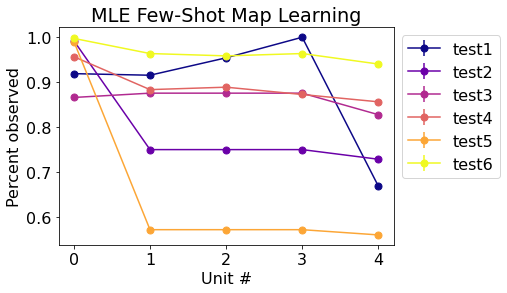

In [106]:
mode="pomcp_mle"
units_percent_envs = []
untis_percent_stds_envs = []
for exp_name in exp:
    print(mode)
    print(exp_name)
    observed_percent = [] 
    if(not "Reflect" in exp_name):
        if(exp_name == "test5"):
            exp_name = "test5_Improved"
        elif(exp_name == "test5_Reflect"):
            exp_name = "test5_Reflect_Improved"



        cache_key = "{}-{}".format(mode, exp_name)
        if(cache_key not in datas_dict.keys()):
            datas = query_specs(all_experiment_specs, lambda x: x['exp_name'] == "{}_experiments_{}".format(exp_name, mode))
            data = datas[0]
            datas_dict[cache_key] = data
        else:
            data = datas_dict[cache_key]

        units_percent = []
        units_percent_stds = []
        for unit_index in range(num_units):
            unit_observed_percent = []

            total = None
            print(len(data))
            observed_state, real_state = data['observed_states'], data['states']

            # compute unit range
            start_range = (num_units-unit_index-1)*observed_state[-1].shape[0]//num_units
            end_range = (num_units-unit_index)*observed_state[-1].shape[0]//num_units

            real_state = real_state[-1][start_range:end_range, :]
            observed_state = observed_state[-1][start_range:end_range, :]
            sy, sx = real_state.shape
            unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
            wall = (real_state == np.ones(real_state.shape)*WALL)
            observed = 0
            total_nonwall = 0
            for syi in range(sy):
                for sxi in range(sx):
                    if(not unobserved[syi, sxi] and not wall[syi, sxi]):
                        observed+=1
                    if(not wall[syi, sxi]):
                        total_nonwall+=1

            unit_observed_percent.append(float(observed)/float(total_nonwall))

            units_percent.append(np.mean(unit_observed_percent))
            units_percent_stds.append(np.std(unit_observed_percent)/np.sqrt(len(unit_observed_percent)))
        units_percent_envs.append(units_percent)
        untis_percent_stds_envs.append(units_percent_stds)

    
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 16}

matplotlib.rc('font', **font)

cmap =  cm.get_cmap("plasma").colors
print(len(cmap))
for upi, (units_percent_env, stds) in enumerate(zip(units_percent_envs, untis_percent_stds_envs)):
    print(units_percent_env)
    print(stds)
    print(upi)
    plt.errorbar(np.arange(len(units_percent_env)), units_percent_env, yerr=stds,  color=cmap[len(cmap)//num_units*upi], marker='o', markersize=7)

plt.legend(exp[::2], bbox_to_anchor=(1, 1))
plt.xlabel("Unit #")
plt.ylabel("Percent observed")
plt.title("MLE Few-Shot Map Learning".format(mode))

    
        

defaultdict(list,
            {'pomcp_simple': [0.9690694626474443,
              0.9992435703479576,
              0.9945307372566178,
              0.48763376932223546,
              0.9882618510158013,
              0.9635780885780886],
             'pomcp_ssp': [0.9695937090432504,
              0.9924357034795764,
              0.933056224021002,
              0.5487514863258026,
              0.9566591422121896,
              0.9662004662004662],
             'pomcp_mle': [0.998951507208388,
              0.9954614220877458,
              0.9398381098227959,
              0.506064209274673,
              0.9918735891647855,
              0.9525058275058275]})